# DATA ANALYSIS AND VISUALISATION

In [ ]:
pip install --upgrade pandas

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Root folder containing the folders with the .npy files
carpeta_raiz='C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento'
# Pattern to search for .npy files in all subfolders  
patron = '**/*.parquet'
# Get list of .npy files matching the pattern
archivos = glob.glob(os.path.join(carpeta_raiz, patron), recursive=True)
archivos

['C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS066-2016-09-01-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS069-2016-10-11-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS069-2016-10-13-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS070-2016-10-18-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS071-2016-10-18-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS075-2017-09-13-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento\\12155577\\boutons\\SS075-2017-09-27-001.parquet',
 'C:/Users/FelipeMartin/OneDrive - University of

In [3]:
# Create a list to store the DataFrames
# Extract the last three folders
def obtener_ultimas_carpetas(ruta):
    carpetas = ruta.split('/')
    return '/'.join(carpetas[-3:])

In [4]:
from fastparquet import ParquetFile

dataframes = []
for archivo in archivos:
    nombre = os.path.splitext(os.path.basename(archivo))[0]
    carpetas = os.path.dirname(archivo).split(os.sep)[-3:]
    folder_name = '-'.join(carpetas) 
    data = pd.read_parquet(archivo, engine='fastparquet')
    
    # Delete rows where 'interval_ID_3' is NaN
    data = data.dropna(subset=['interval_ID_3'])
    #remove null dff rows
    data=data.dropna(subset=['dff'])
    
    data['experiment'] = data['folder_name_x'].apply(obtener_ultimas_carpetas)
    data = data.drop(['folder_nROW','start','end','value_type','folder_name_x','pupil_size_category','speed_category','speed'], axis=1)
    dataframes.append(data)  # Agregar el DataFrame actual a la lista

# Concatenate the DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

### Dataframe with a single experiment (indicate in the path)

In [5]:
ruta_archivo_parquet = "C:/Users/FelipeMartin/OneDrive - University of Sussex/DISSERTATION/segundo intento/12162324/sc neurons 2p/"
nombre_archivo='SS048-2015-11-09-001'
filtered_one_experiment = pd.read_parquet(ruta_archivo_parquet+nombre_archivo+".parquet", engine='fastparquet')
filtered_one_experiment['experiment'] = filtered_one_experiment['folder_name_x'].apply(obtener_ultimas_carpetas)
filtered_one_experiment = filtered_one_experiment.drop(['folder_nROW','start','end','value_type','folder_name_x'], axis=1)

### Dictionary for associating experiments

In [6]:
experiments = [
    "SS038/2015-02-17/001",
    "SS041/2015-04-23/001",
    "SS044/2015-04-28/001",
    "SS044/2015-05-29/001",
    "SS045/2015-05-04/001",
    "SS045/2015-05-05/001",
    "SS047/2015-11-23/001",
    "SS047/2015-12-03/001",
    "SS048/2015-11-09/001",
    "SS048/2015-12-02/001",
    "SS066/2016-09-01/001",
    "SS069/2016-10-11/001",
    "SS069/2016-10-13/001",
    "SS070/2016-10-18/001",
    "SS071/2016-10-18/001",
    "SS075/2017-09-13/001",
    "SS075/2017-09-27/001",
    "SS076/2017-10-04/001",
    "SS077/2017-10-03/001",
    "SS077/2017-10-05/001",
    "SS078/2017-09-28/001",
    "SS078/2017-10-04/001",
    "SS078/2017-10-05/001"
]

experiment_dict = {f"experiment {i+1}": exp for i, exp in enumerate(experiments)}
# Create an inverted dictionary to do the matching
inverse_dict = {v: k for k, v in experiment_dict.items()}

inverse_dict

{'SS038/2015-02-17/001': 'experiment 1',
 'SS041/2015-04-23/001': 'experiment 2',
 'SS044/2015-04-28/001': 'experiment 3',
 'SS044/2015-05-29/001': 'experiment 4',
 'SS045/2015-05-04/001': 'experiment 5',
 'SS045/2015-05-05/001': 'experiment 6',
 'SS047/2015-11-23/001': 'experiment 7',
 'SS047/2015-12-03/001': 'experiment 8',
 'SS048/2015-11-09/001': 'experiment 9',
 'SS048/2015-12-02/001': 'experiment 10',
 'SS066/2016-09-01/001': 'experiment 11',
 'SS069/2016-10-11/001': 'experiment 12',
 'SS069/2016-10-13/001': 'experiment 13',
 'SS070/2016-10-18/001': 'experiment 14',
 'SS071/2016-10-18/001': 'experiment 15',
 'SS075/2017-09-13/001': 'experiment 16',
 'SS075/2017-09-27/001': 'experiment 17',
 'SS076/2017-10-04/001': 'experiment 18',
 'SS077/2017-10-03/001': 'experiment 19',
 'SS077/2017-10-05/001': 'experiment 20',
 'SS078/2017-09-28/001': 'experiment 21',
 'SS078/2017-10-04/001': 'experiment 22',
 'SS078/2017-10-05/001': 'experiment 23'}

In [8]:
merged_df

,nROIs,dff,nROW_x,timestamps,in_interval,gratingID,interval_ID,n_interval,largePupil,interval_ID_enum,interval_ID_3,gratingID_3,interval_ID_enum_2,gratingValue,tamaño_pupila,experiment
0,0,0.449382,527,73.816,False,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1.0,None,38.295481,SS066/2016-09-01/001
1,0,0.546814,528,73.954,False,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,None,34.580921,SS066/2016-09-01/001
2,0,0.417855,529,74.091,False,NaN,NaN,NaN,NaN,NaN,1.0,5.0,3.0,None,36.455554,SS066/2016-09-01/001
3,0,0.168705,530,74.228,False,NaN,NaN,NaN,NaN,NaN,1.0,5.0,4.0,None,34.805461,SS066/2016-09-01/001
4,0,0.291996,531,74.366,False,NaN,NaN,NaN,NaN,NaN,1.0,5.0,5.0,None,35.565191,SS066/2016-09-01/001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55360835,291,-1.011268,9009,1203.427,False,NaN,NaN,NaN,NaN,NaN,195.0,9.0,43.0,None,40.102379,SS048/2015-12-02/001
55360836,291,1.478237,9010,1203.560,False,NaN,NaN,NaN,NaN,NaN,195.0,9.0,44.0,None,40.507955,SS048/2015-12-02/001
55360837,291,0.683823,9011,1203.694,False,NaN,NaN,NaN,NaN,NaN,195.0,9.0,45.0,None,40.570332,SS048/2015-12-02/001
55360838,291,0.179460,9012,1203.827,False,NaN,NaN,NaN,NaN,NaN,195.0,9.0,46.0,None,40.826960,SS048/2015-12-02/001


In [17]:
# Crear el diccionario de mapeo
mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}


In [16]:
# Crear el diccionario de mapeo
mapping_arousal = {0: 'Non-arousal', 1: 'Arousal'}


# General exploratory analysis

## Number of neurons per experiment

In [33]:
neuronas_por_experimento = merged_df.groupby('experiment')['nROIs'].nunique().reset_index()
# add id_experiment
neuronas_por_experimento['experiment_id'] = neuronas_por_experimento['experiment'].map(inverse_dict)

neuronas_por_experimento

,experiment,nROIs,experiment_id
0,SS038/2015-02-17/001,251,experiment 1
1,SS041/2015-04-23/001,383,experiment 2
2,SS044/2015-04-28/001,546,experiment 3
3,SS044/2015-05-29/001,383,experiment 4
4,SS045/2015-05-04/001,341,experiment 5
5,SS045/2015-05-05/001,406,experiment 6
6,SS047/2015-11-23/001,508,experiment 7
7,SS047/2015-12-03/001,386,experiment 8
8,SS048/2015-11-09/001,233,experiment 9
9,SS048/2015-12-02/001,292,experiment 10


In [34]:
neuronas_total = neuronas_por_experimento.sum()
neuronas_total

experiment       SS038/2015-02-17/001SS041/2015-04-23/001SS044/...
nROIs                                                         6351
experiment_id    experiment 1experiment 2experiment 3experiment...
dtype: object

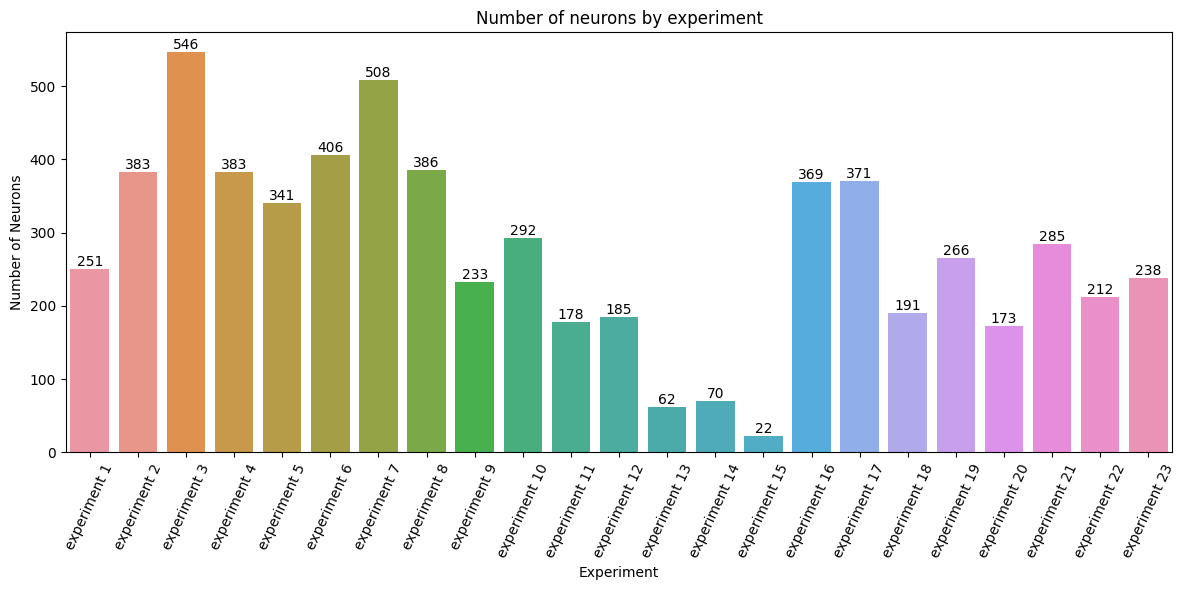

In [39]:

# Crear el gráfico utilizando Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='nROIs', data=neuronas_por_experimento)
plt.xlabel('Experiment')
plt.ylabel('Number of Neurons')
plt.title('Number of neurons by experiment')
plt.xticks(rotation=65)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()

# Agregar los valores de los intervalos encima de las barras
for index, row in neuronas_por_experimento.iterrows():
    plt.annotate(str(row['nROIs']), xy=(index, row['nROIs']), ha='center', va='bottom')
plt.show()

## Number of records per experiment

In [40]:
intervalos_por_experimento = merged_df[merged_df['in_interval']==True].count().reset_index()
intervalos_por_experimento

,index,0
0,nROIs,18657296
1,dff,18657296
2,nROW_x,18657296
3,timestamps,18657296
4,in_interval,18657296
5,gratingID,18657296
6,interval_ID,18657296
7,n_interval,18657296
8,largePupil,17223135
9,interval_ID_enum,18657296


In [42]:
intervalos_por_experimento = merged_df.groupby(['experiment'])['dff'].count().reset_index()
# add id_experiment
intervalos_por_experimento['experiment_id'] = intervalos_por_experimento['experiment'].map(inverse_dict)
intervalos_por_experimento

,experiment,dff,experiment_id
0,SS038/2015-02-17/001,3025303,experiment 1
1,SS041/2015-04-23/001,2863308,experiment 2
2,SS044/2015-04-28/001,3893966,experiment 3
3,SS044/2015-05-29/001,2403112,experiment 4
4,SS045/2015-05-04/001,3218403,experiment 5
5,SS045/2015-05-05/001,3770928,experiment 6
6,SS047/2015-11-23/001,4434332,experiment 7
7,SS047/2015-12-03/001,3372482,experiment 8
8,SS048/2015-11-09/001,2034556,experiment 9
9,SS048/2015-12-02/001,2548868,experiment 10


In [43]:
intervalos_por_experimento = merged_df.groupby(['experiment','in_interval'])['dff'].count().reset_index()
# add id_experiment
intervalos_por_experimento['experiment_id'] = intervalos_por_experimento['experiment'].map(inverse_dict)
intervalos_por_experimento

,experiment,in_interval,dff,experiment_id
0,SS038/2015-02-17/001,False,2023060,experiment 1
1,SS038/2015-02-17/001,True,1002243,experiment 1
2,SS041/2015-04-23/001,False,1959811,experiment 2
3,SS041/2015-04-23/001,True,903497,experiment 2
4,SS044/2015-04-28/001,False,2607044,experiment 3
5,SS044/2015-04-28/001,True,1286922,experiment 3
6,SS044/2015-05-29/001,False,1650900,experiment 4
7,SS044/2015-05-29/001,True,752212,experiment 4
8,SS045/2015-05-04/001,False,2210748,experiment 5
9,SS045/2015-05-04/001,True,1007655,experiment 5


In [46]:
records_by_experiment = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment'])['dff'].count().reset_index()
records_by_experiment['experiment_id'] = records_by_experiment['experiment'].map(inverse_dict)

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_22732\1004375322.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  records_by_experiment = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment'])['dff'].count().reset_index()


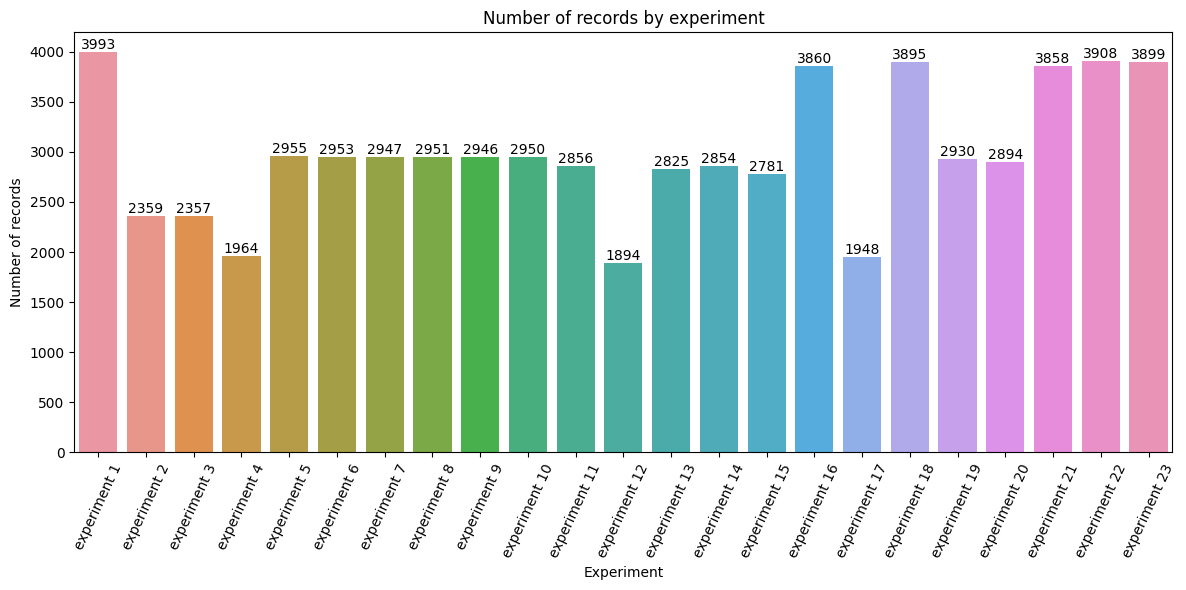

In [47]:
# Calculate the number of records per experiment
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='dff', data=records_by_experiment)
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records by experiment')
plt.xticks(rotation=65)  
plt.tight_layout()

# Add the values of the intervals above the bars
for index, row in records_by_experiment.iterrows():
    plt.annotate(str(row['dff']), xy=(index, row['dff']), ha='center', va='bottom')

plt.show()

## Number of records by experiment by neuron

In [48]:
records_by_experiment_by_neuron = merged_df[merged_df['in_interval']==True].groupby(['experiment'])['dff'].count().reset_index()
records_by_experiment_by_neuron['experiment_id'] = records_by_experiment_by_neuron['experiment'].map(inverse_dict)

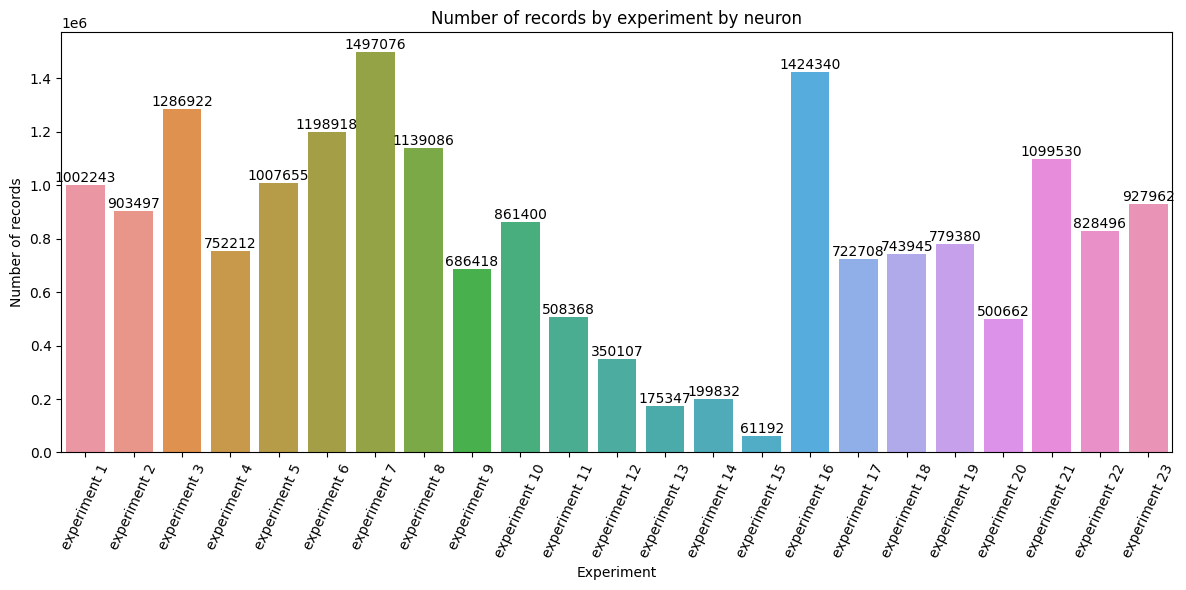

In [49]:
# Calculate the number of records by experiment by neuron
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='dff', data=records_by_experiment_by_neuron)
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records by experiment by neuron')
plt.xticks(rotation=65)   
plt.tight_layout()

# Add the values of the intervals above the bars
for index, row in records_by_experiment_by_neuron.iterrows():
    plt.annotate(str(row['dff']), xy=(index, row['dff']), ha='center', va='bottom')

plt.show()

## Number of records per experiment per grating value

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_22336\671301099.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  records_by_experiment = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','gratingValue'])['dff'].count().reset_index()


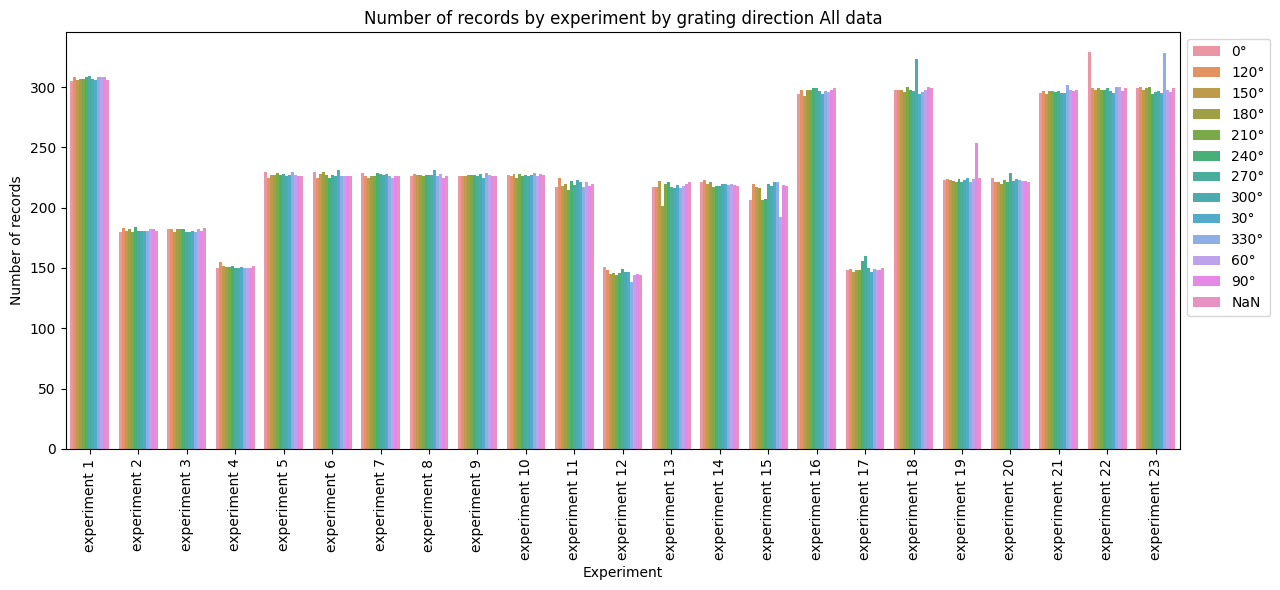

In [25]:
# Calculate the number of neurons per experiment
import seaborn as sns
import matplotlib.pyplot as plt

records_by_experiment = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','gratingValue'])['dff'].count().reset_index()
records_by_experiment['experiment_id'] = records_by_experiment['experiment'].map(inverse_dict)

plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='dff', data=records_by_experiment, hue='gratingValue')
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records by experiment by grating direction All data')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), numpoints=2,ncol=1, fontsize=10)

for index, row in records_by_experiment_by_neuron.iterrows():
    plt.annotate(str(row['dff']), xy=(index, row['dff']), ha='center', va='bottom')

plt.show()

## Number of records per experiment per grating value AROUSAL


C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_22336\1117169635.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['largePupil']==1]
C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_22336\1117169635.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['largePupil']==1]


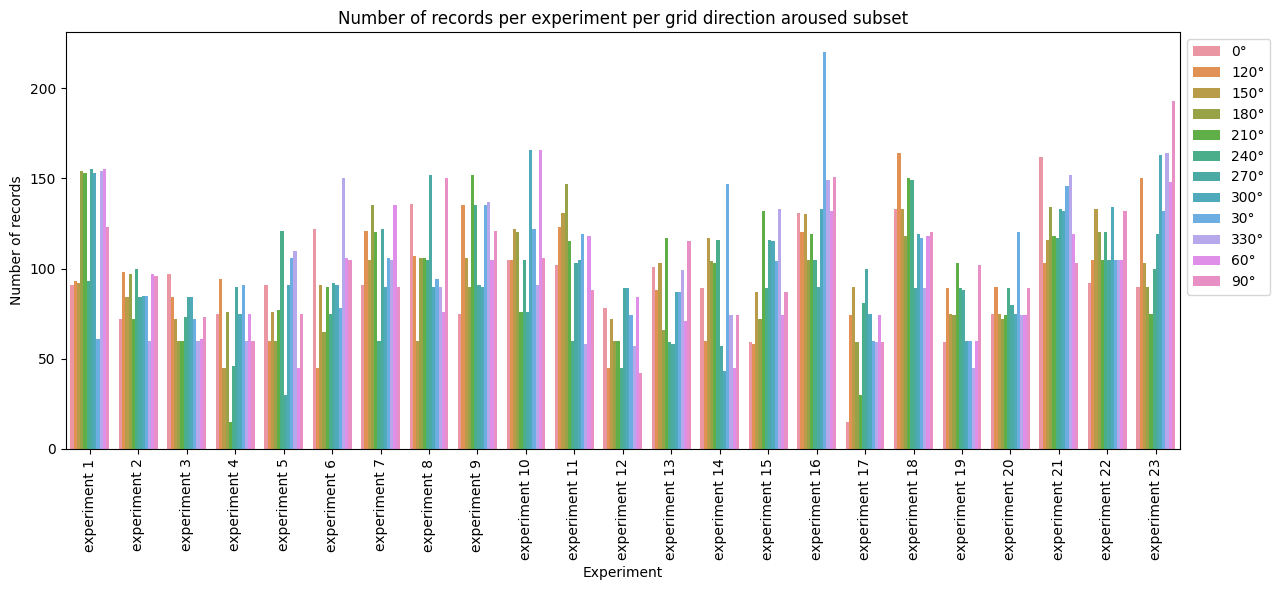

In [19]:
# Calculate the number of records per experiment per grating value in AROUSAL
import seaborn as sns
import matplotlib.pyplot as plt

data=merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['largePupil']==1]
records_by_experiment = data.groupby(['experiment','gratingValue'])['dff'].count().reset_index()
records_by_experiment['experiment_id'] = records_by_experiment['experiment'].map(inverse_dict)

plt.figure(figsize=(12, 6))

sns.barplot(x='experiment_id', y='dff', data=records_by_experiment, hue='gratingValue')
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records per experiment per grid direction aroused subset')
plt.xticks(rotation=90)   # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), numpoints=2,ncol=1, fontsize=10)


plt.show()

## Number of records per experiment per grating value NON-AROUSAL

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_22336\2471279334.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['largePupil']==0]
C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_22336\2471279334.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['largePupil']==0]


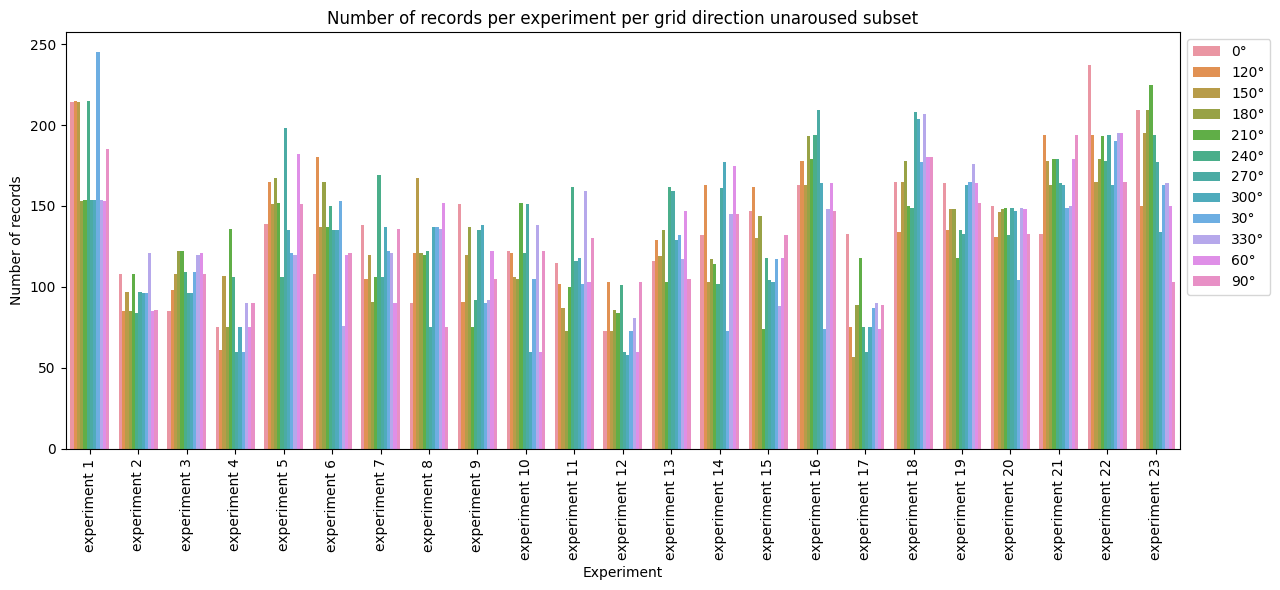

In [20]:
# Calculate the number of records per experiment per grating value in NON-AROUSAL
import seaborn as sns
import matplotlib.pyplot as plt

data=merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['largePupil']==0]
records_by_experiment = data.groupby(['experiment','gratingValue'])['dff'].count().reset_index()
records_by_experiment['experiment_id'] = records_by_experiment['experiment'].map(inverse_dict)

plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='dff', data=records_by_experiment, hue='gratingValue')
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records per experiment per grid direction unaroused subset')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), numpoints=2,ncol=1, fontsize=10)


plt.show()

## Number of intervals per experiment

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_16260\1423442200.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intervals_by_experiment = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','gratingValue'])['interval_ID'].nunique().reset_index()


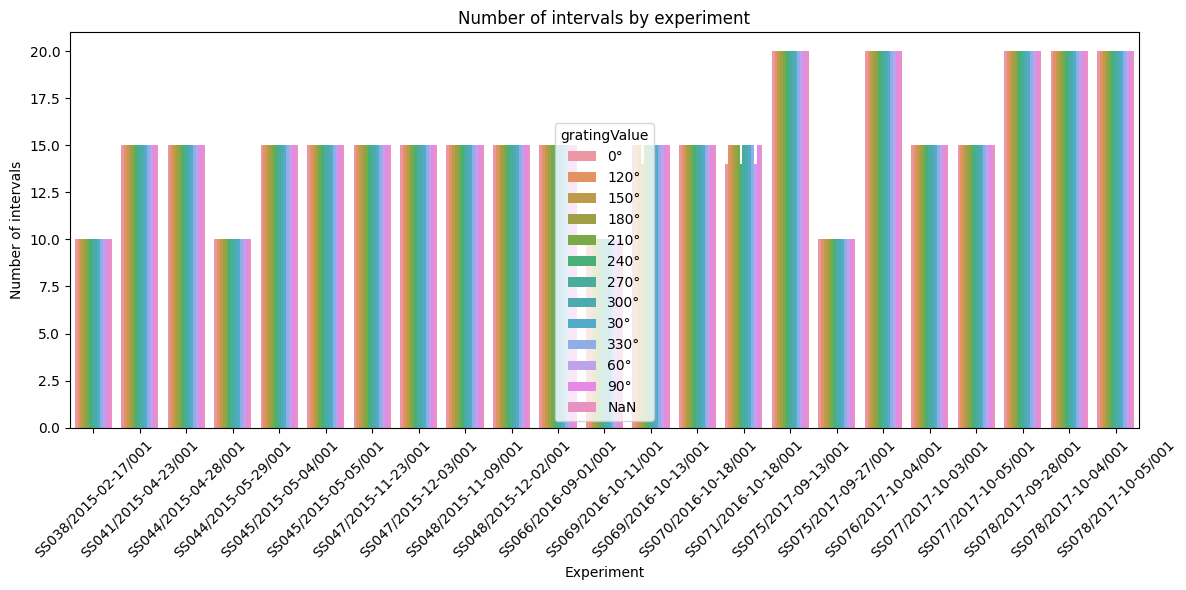

In [35]:
# Calculate the number of intervals per experiment

import seaborn as sns
import matplotlib.pyplot as plt

intervals_by_experiment = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','gratingValue'])['interval_ID'].nunique().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(x='experiment', y='interval_ID', data=intervals_by_experiment,hue='gratingValue', estimator=sum)
plt.xlabel('Experiment')
plt.ylabel('Number of intervals')
plt.title('Number of intervals by experiment')
plt.xticks(rotation=45)  
plt.tight_layout()


plt.show()

In [36]:
intervals_by_experiment

,experiment,gratingValue,interval_ID
0,SS038/2015-02-17/001,0°,10
1,SS038/2015-02-17/001,120°,10
2,SS038/2015-02-17/001,150°,10
3,SS038/2015-02-17/001,180°,10
4,SS038/2015-02-17/001,210°,10
...,...,...,...
294,SS078/2017-10-05/001,30°,20
295,SS078/2017-10-05/001,330°,20
296,SS078/2017-10-05/001,60°,20
297,SS078/2017-10-05/001,90°,20


## Number of records per angle at global level

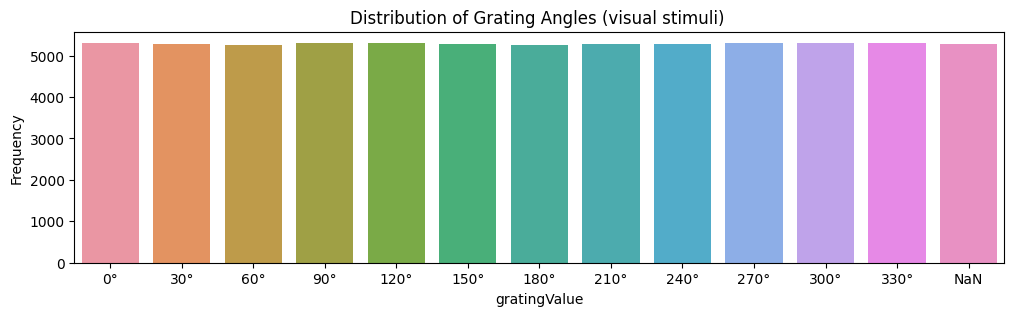

In [9]:
plt.figure(figsize=(12, 3))

distributiondata=merged_df[merged_df['gratingID']!='NaN'][merged_df['nROIs']==0]
distributiondata=distributiondata.sort_values(by='gratingID')
# Use countplot to create the chart
sns.countplot(data=distributiondata, x='gratingValue')
plt.ylabel('Frequency')
plt.title('Distribution of Grating Angles (visual stimuli) ')
plt.show()

## 2-second intervals

In [15]:
intervals_groupby=intervals_unique.groupby(['gratingValue','gratingID'])
intervals_by_angle = intervals_groupby['interval_ID'].count()
intervals_by_angle = pd.DataFrame(intervals_by_angle)
intervals_by_angle=intervals_by_angle.sort_values(by='gratingID')
intervals_by_angle = intervals_by_angle.reset_index()
intervals_by_angle

,gratingValue,gratingID,interval_ID
0,0°,1.0,10
1,30°,2.0,10
2,60°,3.0,10
3,90°,4.0,10
4,120°,5.0,10
5,150°,6.0,10
6,180°,7.0,10
7,210°,8.0,10
8,240°,9.0,10
9,270°,10.0,10


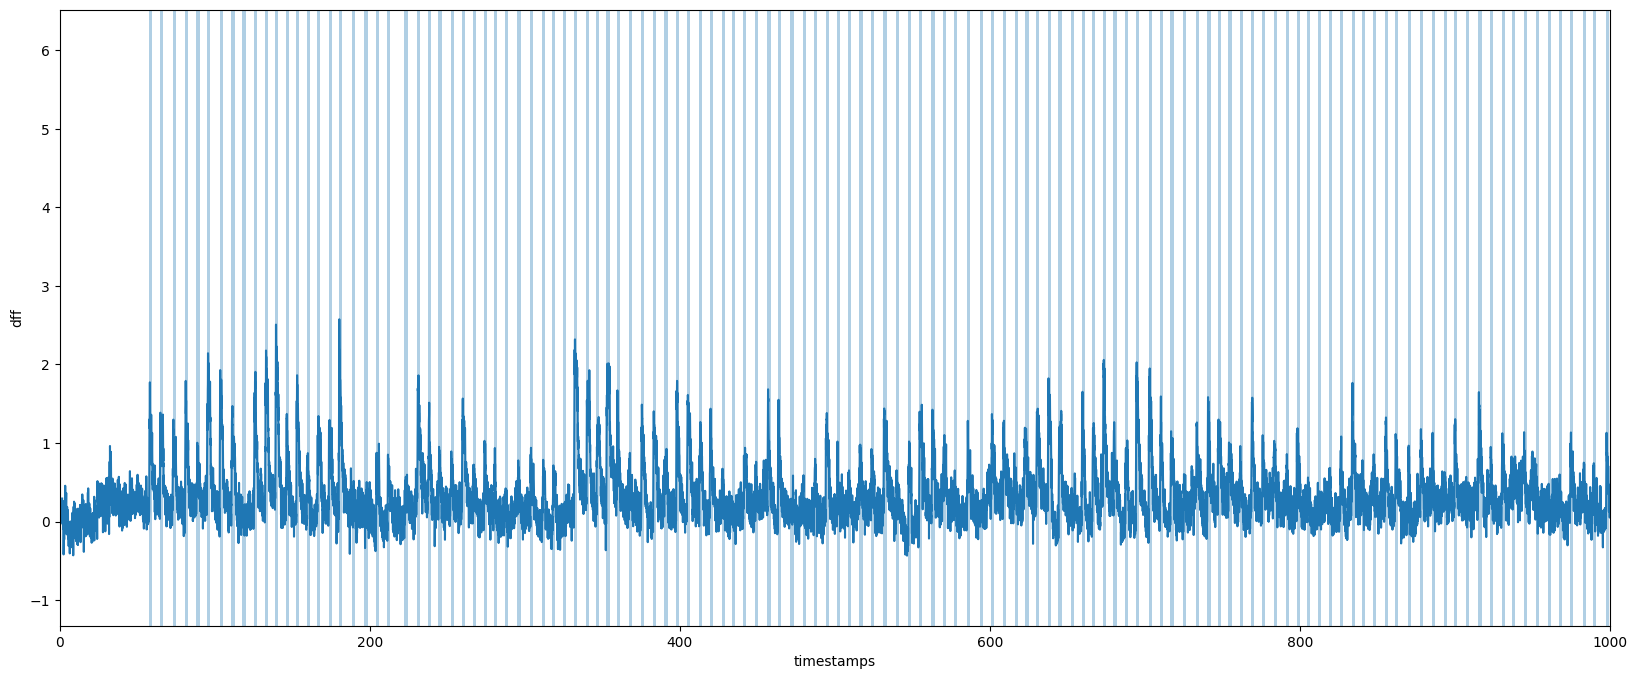

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(20,8))
filtered_data =filtered_one_experiment[filtered_one_experiment['gratingID']!='NaN'][filtered_one_experiment['nROIs']==0]
# Crear el gráfico de líneas con Seaborn
sns.lineplot(x='timestamps', y='dff', data=filtered_data)
plt.xlim(0,1000)

for index, row in intervals_unique.iterrows():
    row['gratingID']
    grating_id = int(row['gratingID'])
    plt.axvspan(row['start'], row['end'], alpha=0.35)

#Mostrar el gráfico
#plt.legend()
plt.show()

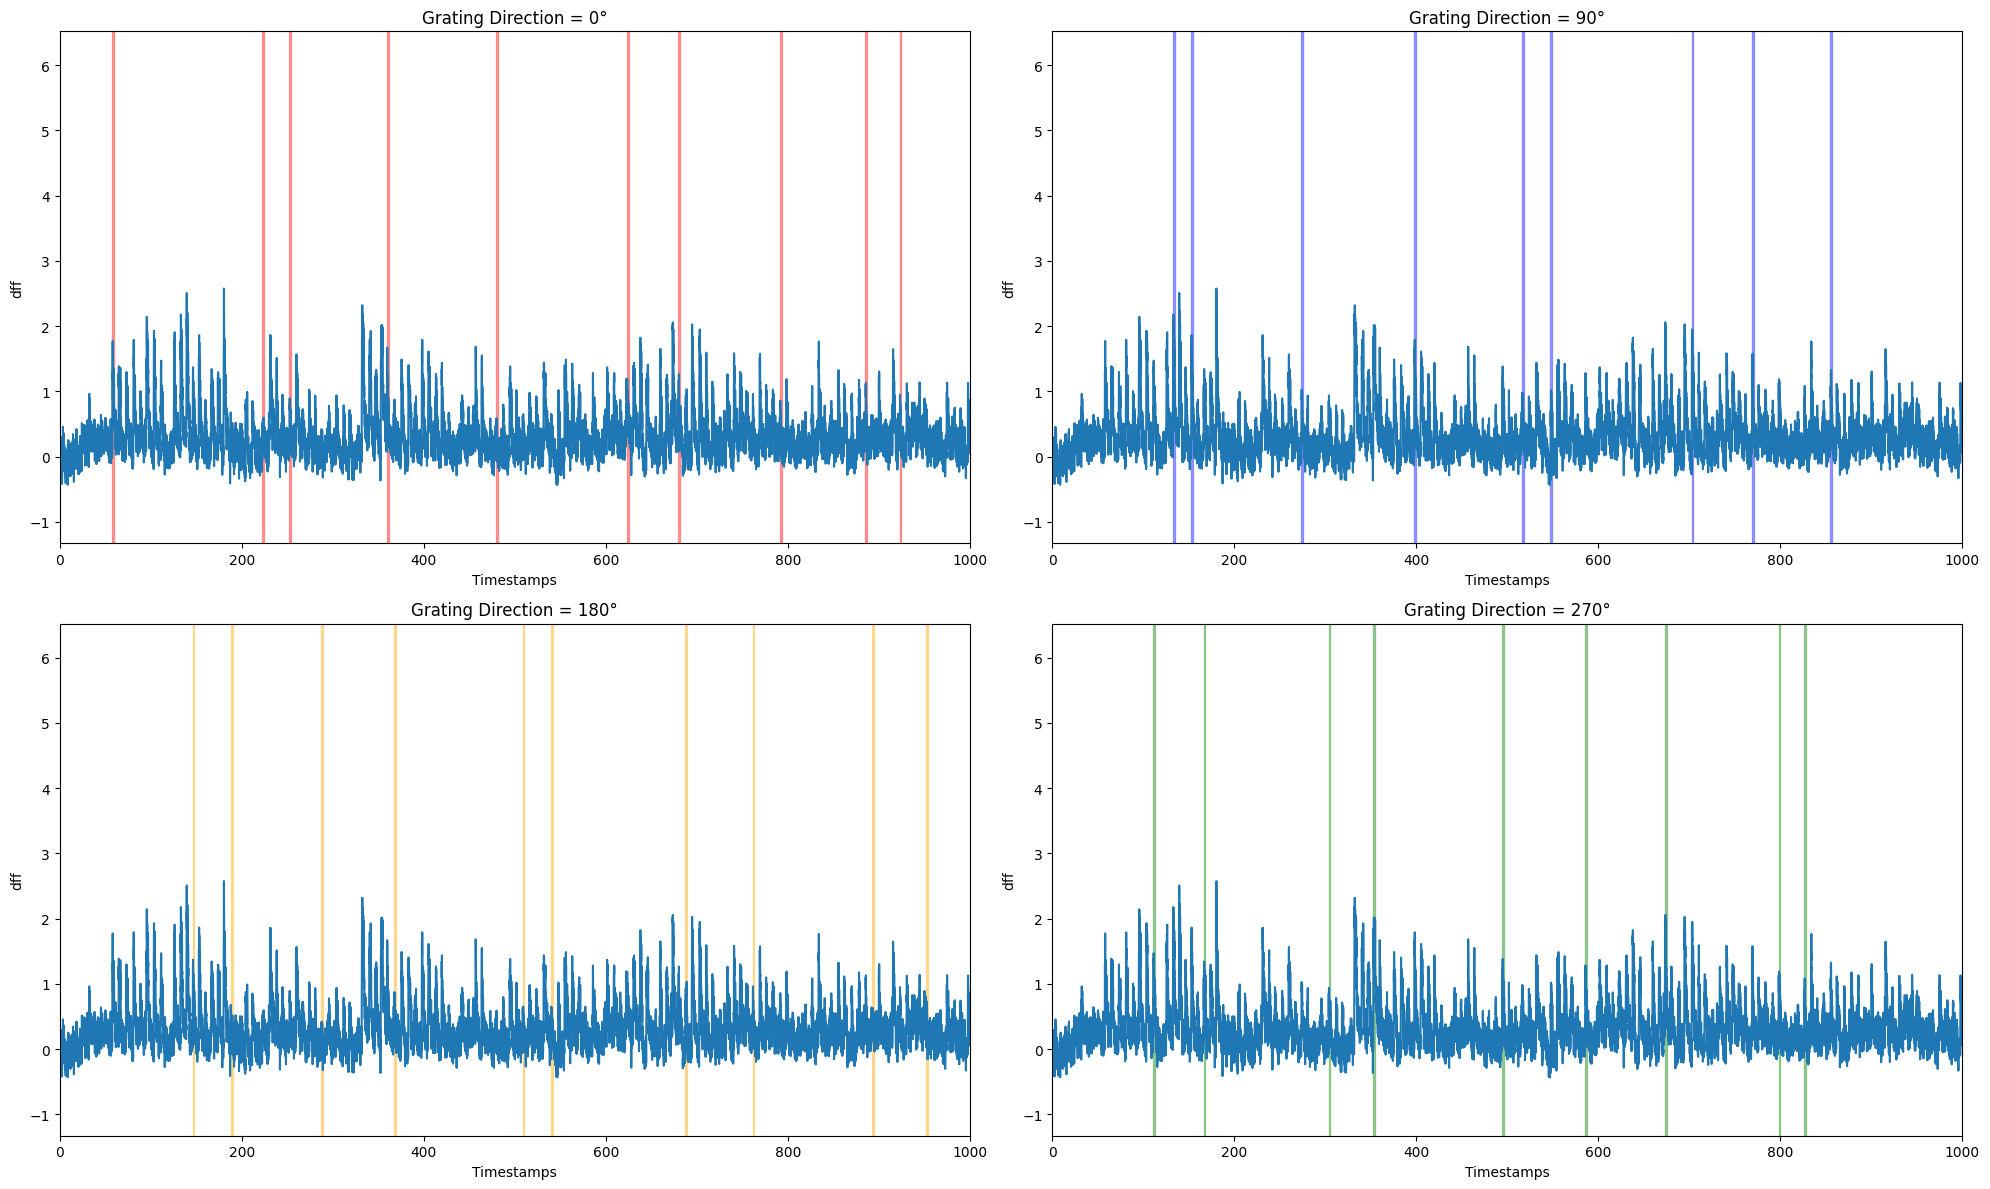

In [14]:
# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
span_palette = ['red','blue','orange','green']

# List of gratingIDs to filter the data
grating_ids = [1, 4, 7, 10]
grating_values=['0°','90°','180°','270°']

# Loop through the subplots and plot the filtered data for each gratingID
for i, grating_value in enumerate(grating_values):
    # Filter the data for the current gratingID
    filtered_data = filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0)]

    # Get the current subplot axis
    ax = axs[i // 2, i % 2]

    # Create the line plot using Seaborn
    sns.lineplot(x='timestamps', y='dff', data=filtered_data, ax=ax)

    # Set the plot title and labels
    ax.set_title(f'Grating Direction = {grating_value}')
    ax.set_xlabel('Timestamps')
    ax.set_ylabel('dff')

    # Set the x-axis limit for all subplots
    ax.set_xlim(0, 1000)

    # Plot the intervals as shaded regions for each subplot
    for index, row in intervals_unique.iterrows():
        if (row['gratingValue']) == grating_value:
            ax.axvspan(row['start'], row['end'], alpha=0.35,color=span_palette[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Number of intervals per angle

In [16]:
intervals=merged_df[merged_df['nROIs']==0 ][merged_df['in_interval']==True ][['experiment','interval_ID','gratingID','gratingValue']]
intervals_unique=intervals.drop_duplicates(['experiment','interval_ID','gratingID','gratingValue'])

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_332\929476870.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intervals=merged_df[merged_df['nROIs']==0 ][merged_df['in_interval']==True ][['experiment','interval_ID','gratingID','gratingValue']]


In [17]:
intervals_unique

,experiment,interval_ID,gratingID,gratingValue
19,SS066/2016-09-01/001,1.0,5.0,120°
67,SS066/2016-09-01/001,2.0,12.0,330°
119,SS066/2016-09-01/001,3.0,6.0,150°
171,SS066/2016-09-01/001,4.0,3.0,60°
224,SS066/2016-09-01/001,5.0,7.0,180°
...,...,...,...,...
52820485,SS048/2015-12-02/001,191.0,3.0,60°
52820532,SS048/2015-12-02/001,192.0,1.0,0°
52820579,SS048/2015-12-02/001,193.0,10.0,270°
52820623,SS048/2015-12-02/001,194.0,7.0,180°


In [18]:
intervals_groupby=intervals_unique.groupby(['gratingValue','gratingID','experiment'])
intervals_by_angle = intervals_groupby['interval_ID'].count()
# add id_experiment
intervals_by_angle = pd.DataFrame(intervals_by_angle)
intervals_by_angle=intervals_by_angle.sort_values(by=['gratingID','experiment'])
intervals_by_angle = intervals_by_angle.reset_index()
intervals_by_angle['experiment_id'] = intervals_by_angle['experiment'].map(inverse_dict)

In [19]:
intervals_by_angle

,gratingValue,gratingID,experiment,interval_ID,experiment_id
0,0°,1.0,SS038/2015-02-17/001,10,experiment 1
1,0°,1.0,SS041/2015-04-23/001,15,experiment 2
2,0°,1.0,SS044/2015-04-28/001,15,experiment 3
3,0°,1.0,SS044/2015-05-29/001,10,experiment 4
4,0°,1.0,SS045/2015-05-04/001,15,experiment 5
...,...,...,...,...,...
294,NaN,13.0,SS077/2017-10-03/001,15,experiment 19
295,NaN,13.0,SS077/2017-10-05/001,15,experiment 20
296,NaN,13.0,SS078/2017-09-28/001,20,experiment 21
297,NaN,13.0,SS078/2017-10-04/001,20,experiment 22


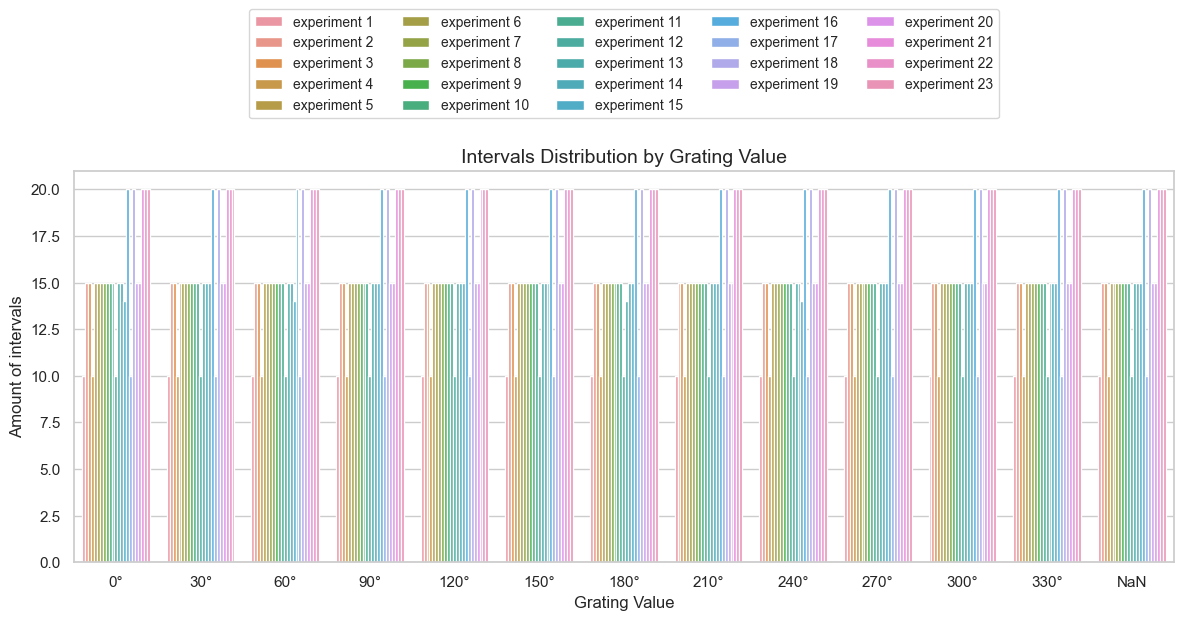

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12,7))
sns.barplot(y='interval_ID', x='gratingValue', data=intervals_by_angle, hue='experiment_id', orient='v')
plt.title('Intervals Distribution by Grating Value', fontsize=14)  # Tamaño de fuente del título
plt.xlabel('Grating Value')
plt.ylabel('Amount of intervals')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.43), numpoints=2,ncol=len(intervals_by_angle['experiment'].unique())/4, fontsize=10)
plt.tight_layout() 
plt.show()

## Number of records per angle per experiment

In [11]:
distributiondata=merged_df[merged_df['gratingID']>0][merged_df['nROIs']==0]
distributiondata['experiment_id'] = distributiondata['experiment'].map(inverse_dict)
distributiondata=distributiondata.sort_values(by=['experiment','gratingID'])

distributiondata

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_332\515333715.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  distributiondata=merged_df[merged_df['gratingID']>0][merged_df['nROIs']==0]


,nROIs,dff,nROW_x,timestamps,in_interval,gratingID,interval_ID,n_interval,largePupil,interval_ID_enum,interval_ID_3,gratingID_3,interval_ID_enum_2,gratingValue,tamaño_pupila,experiment,experiment_id
23795613,0,0.111796,854,57.604,True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,32.0,0°,38.470175,SS038/2015-02-17/001,experiment 1
23795614,0,0.129263,855,57.670,True,1.0,1.0,1.0,1.0,2.0,1.0,1.0,33.0,0°,38.692042,SS038/2015-02-17/001,experiment 1
23795615,0,0.577877,856,57.736,True,1.0,1.0,1.0,1.0,3.0,1.0,1.0,34.0,0°,39.798311,SS038/2015-02-17/001,experiment 1
23795616,0,0.963920,857,57.801,True,1.0,1.0,1.0,1.0,4.0,1.0,1.0,35.0,0°,39.945150,SS038/2015-02-17/001,experiment 1
23795617,0,1.300995,858,57.867,True,1.0,1.0,1.0,1.0,5.0,1.0,1.0,36.0,0°,39.422937,SS038/2015-02-17/001,experiment 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21383908,0,0.001540,10383,1406.588,True,13.0,250.0,20.0,NaN,11.0,250.0,13.0,11.0,NaN,27.346633,SS078/2017-10-05/001,experiment 23
21383909,0,0.909694,10384,1406.723,True,13.0,250.0,20.0,NaN,12.0,250.0,13.0,12.0,NaN,27.315374,SS078/2017-10-05/001,experiment 23
21383910,0,0.085037,10385,1406.858,True,13.0,250.0,20.0,NaN,13.0,250.0,13.0,13.0,NaN,26.877995,SS078/2017-10-05/001,experiment 23
21383911,0,0.302505,10386,1406.994,True,13.0,250.0,20.0,NaN,14.0,250.0,13.0,14.0,NaN,27.011433,SS078/2017-10-05/001,experiment 23


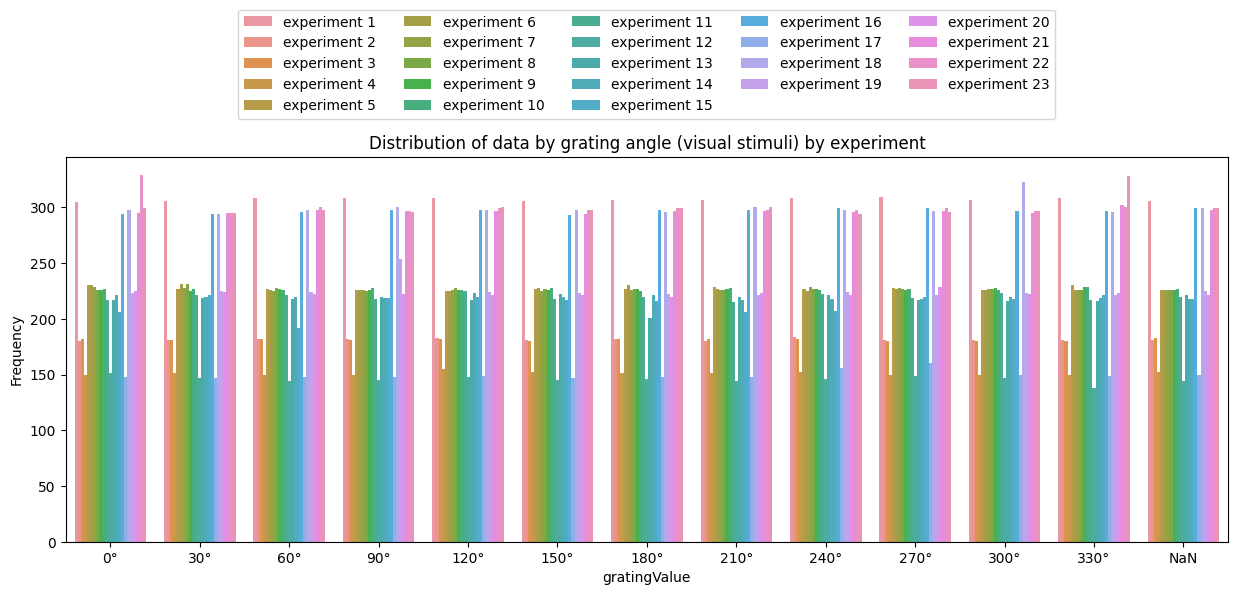

In [14]:
# Set the size of the figure
plt.figure(figsize=(15,5))

sns.countplot(data=distributiondata, x='gratingValue', hue='experiment_id')
plt.ylabel('Frequency')
plt.title('Distribution of data by grating angle (visual stimuli) by experiment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), numpoints=2,ncol=len(distributiondata['experiment'].unique())/4, fontsize=10)
plt.show()

## Number of records per experiment separated by largepupil/smallpupil

In [8]:
records_by_experiment_by_pupilsize = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','largePupil'])['timestamps'].count().reset_index()
records_by_experiment_by_pupilsize['experiment_id'] = records_by_experiment_by_pupilsize['experiment'].map(inverse_dict)

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_27448\415189584.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  records_by_experiment_by_pupilsize = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','largePupil'])['timestamps'].count().reset_index()


In [28]:
# Define function for categorising
def category_pupil(value):
    if value == 1:
        return 'Large pupil'
    elif value == 0:
        return 'Small pupil'
    elif value=='NaN':
        return 'NaN'
    
# Apply the function to the column 'largePupil' to create the new column 'pupil_size_category'.
records_by_experiment_by_pupilsize['pupil_size_category'] = records_by_experiment_by_pupilsize['largePupil'].apply(category_pupil)

records_by_experiment_by_pupilsize

,experiment,largePupil,timestamps,experiment_id,pupil_size_category2,pupil_size_category
0,SS038/2015-02-17/001,0.0,2210,experiment 1,Small pupil,Small pupil
1,SS038/2015-02-17/001,1.0,1477,experiment 1,Large pupil,Large pupil
2,SS041/2015-04-23/001,0.0,1148,experiment 2,Small pupil,Small pupil
3,SS041/2015-04-23/001,1.0,1030,experiment 2,Large pupil,Large pupil
4,SS044/2015-04-28/001,0.0,1294,experiment 3,Small pupil,Small pupil
5,SS044/2015-04-28/001,1.0,880,experiment 3,Large pupil,Large pupil
6,SS044/2015-05-29/001,0.0,1010,experiment 4,Small pupil,Small pupil
7,SS044/2015-05-29/001,1.0,802,experiment 4,Large pupil,Large pupil
8,SS045/2015-05-04/001,0.0,1787,experiment 5,Small pupil,Small pupil
9,SS045/2015-05-04/001,1.0,942,experiment 5,Large pupil,Large pupil


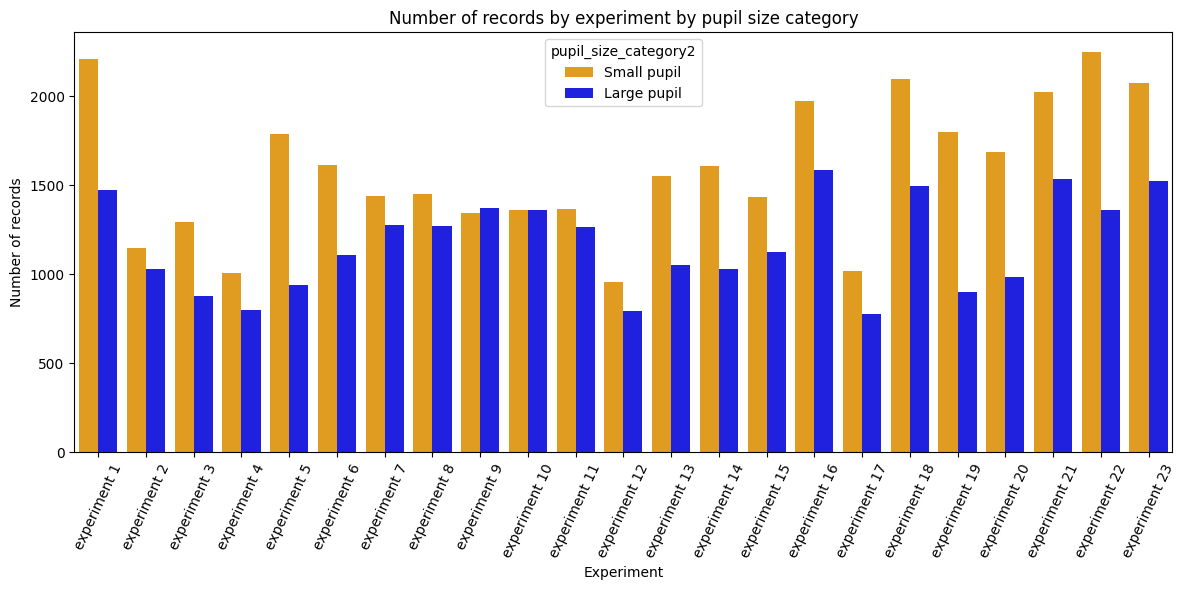

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['orange', 'blue'] 
plt.figure(figsize=(12, 6))
sns.barplot(x='experiment_id', y='timestamps', data=records_by_experiment_by_pupilsize,hue='pupil_size_category2', palette=colors)
plt.xlabel('Experiment')
plt.ylabel('Number of records')
plt.title('Number of records by experiment by pupil size category')
plt.xticks(rotation=65)   
plt.tight_layout()
plt.show()

In [16]:
records_by_experiment_by_pupilsize_by_grating = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','largePupil','gratingValue'])['timestamps'].count().reset_index()
records_by_experiment_by_pupilsize_by_grating['experiment_id'] = records_by_experiment_by_pupilsize_by_grating['experiment'].map(inverse_dict)

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_27448\1856702997.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  records_by_experiment_by_pupilsize_by_grating = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0].groupby(['experiment','largePupil','gratingValue'])['timestamps'].count().reset_index()


# Data variability

## dff values per experiment

In [10]:
data=merged_df[merged_df['in_interval']==True]

In [11]:
grouped = data.groupby(['experiment','largePupil'])['dff'].describe().reset_index()

In [12]:
grouped['experiment_id'] = grouped['experiment'].map(inverse_dict)

In [13]:
grouped

,experiment,largePupil,count,mean,std,min,25%,50%,75%,max,experiment_id
0,SS038/2015-02-17/001,0.0,554710.0,1.203299,2.934160,-9.762318,0.085327,0.386181,1.230637,44.219781,experiment 1
1,SS038/2015-02-17/001,1.0,370727.0,1.134479,2.836397,-6.845365,0.066349,0.368556,1.159352,49.377547,experiment 1
2,SS041/2015-04-23/001,0.0,439684.0,1.471634,5.898190,-124.002199,0.113776,0.542303,1.611613,388.277514,experiment 2
3,SS041/2015-04-23/001,1.0,394490.0,1.596124,6.452020,-165.589285,0.131486,0.601978,1.796975,371.318086,experiment 2
4,SS044/2015-04-28/001,0.0,706524.0,1.000300,2.541609,-13.436065,0.105300,0.348221,0.918298,98.308131,experiment 3
5,SS044/2015-04-28/001,1.0,480480.0,1.073173,2.495557,-18.547568,0.115142,0.385006,1.042397,88.428924,experiment 3
6,SS044/2015-05-29/001,0.0,386830.0,1.244473,2.811683,-5.459753,0.104971,0.419668,1.206512,43.423456,experiment 4
7,SS044/2015-05-29/001,1.0,307166.0,1.327798,2.921186,-7.959724,0.127458,0.459068,1.308407,48.585872,experiment 4
8,SS045/2015-05-04/001,0.0,609367.0,1.497346,3.046131,-11.648159,0.116799,0.603306,1.880889,58.463365,experiment 5
9,SS045/2015-05-04/001,1.0,321222.0,1.596579,3.024022,-10.038766,0.125767,0.654693,2.055412,57.109473,experiment 5


In [14]:
data=data.sort_values(by=['experiment','nROIs'])

In [18]:
data['experiment_id'] = data['experiment'].map(inverse_dict)
data['arousal_category'] = data['largePupil'].map(mapping_arousal)
grouped['arousal_category'] =grouped['largePupil'].map(mapping_arousal)


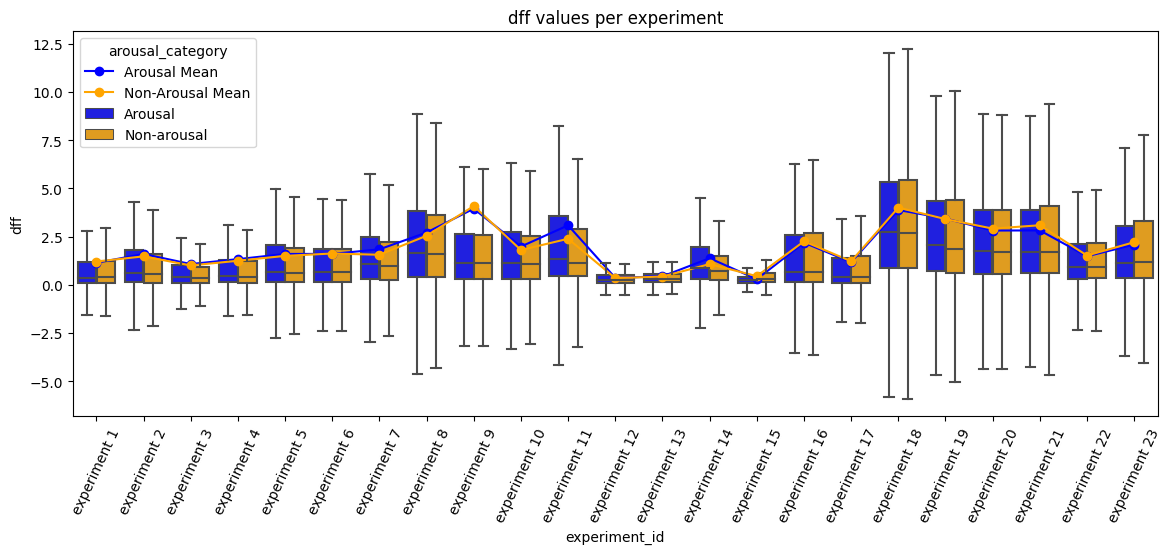

In [34]:
plt.figure(figsize=(14, 5))
data_arousal = grouped[grouped['arousal_category'] == 'Arousal']
data_non_arousal = grouped[grouped['arousal_category'] == 'Non-arousal']
plt.plot('experiment_id', 'mean', data=data_arousal, marker='o', color='blue', label='Arousal Mean')
plt.plot('experiment_id', 'mean', data=data_non_arousal, marker='o', color='orange', label='Non-Arousal Mean')
sns.boxplot(x="experiment_id", y="dff", data=data,showfliers=False, hue='arousal_category',hue_order=['Arousal','Non-arousal'],palette =['blue','orange'])
plt.xticks(rotation=65) 
plt.title("dff values per experiment")
plt.show()

<Axes: xlabel='dff', ylabel='Count'>

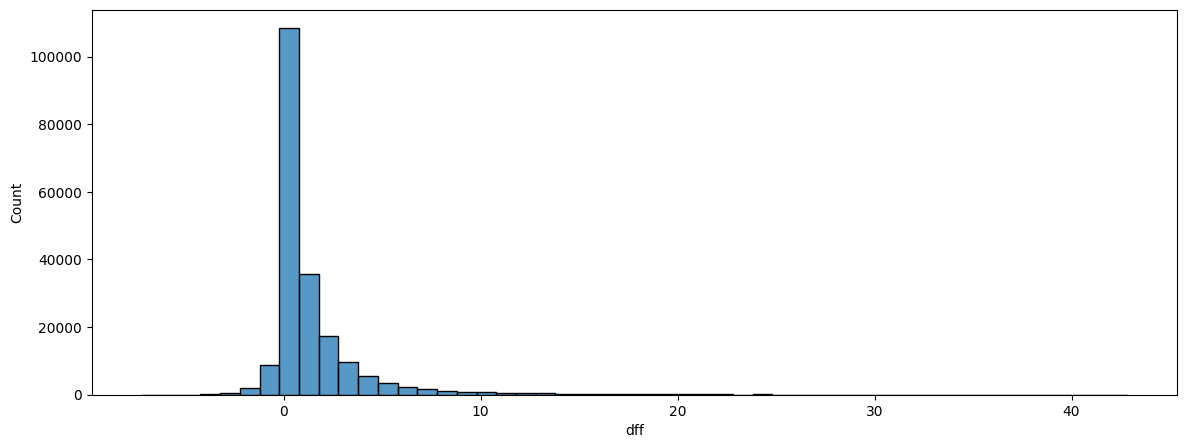

In [38]:
# Configurar el tamaño de la figura
plt.figure(figsize=(14, 5))

sns.histplot(merged_df[(merged_df['nROIs'] == 0)], x="dff",bins=50) 

##  dff values per gratingvalues per experiment

['SS038/2015-02-17/001' 'SS041/2015-04-23/001' 'SS044/2015-04-28/001'
 'SS044/2015-05-29/001' 'SS045/2015-05-04/001' 'SS045/2015-05-05/001'
 'SS047/2015-11-23/001' 'SS047/2015-12-03/001' 'SS048/2015-11-09/001'
 'SS048/2015-12-02/001' 'SS066/2016-09-01/001' 'SS069/2016-10-11/001'
 'SS069/2016-10-13/001' 'SS070/2016-10-18/001' 'SS071/2016-10-18/001'
 'SS075/2017-09-13/001' 'SS075/2017-09-27/001' 'SS076/2017-10-04/001'
 'SS077/2017-10-03/001' 'SS077/2017-10-05/001' 'SS078/2017-09-28/001'
 'SS078/2017-10-04/001' 'SS078/2017-10-05/001']


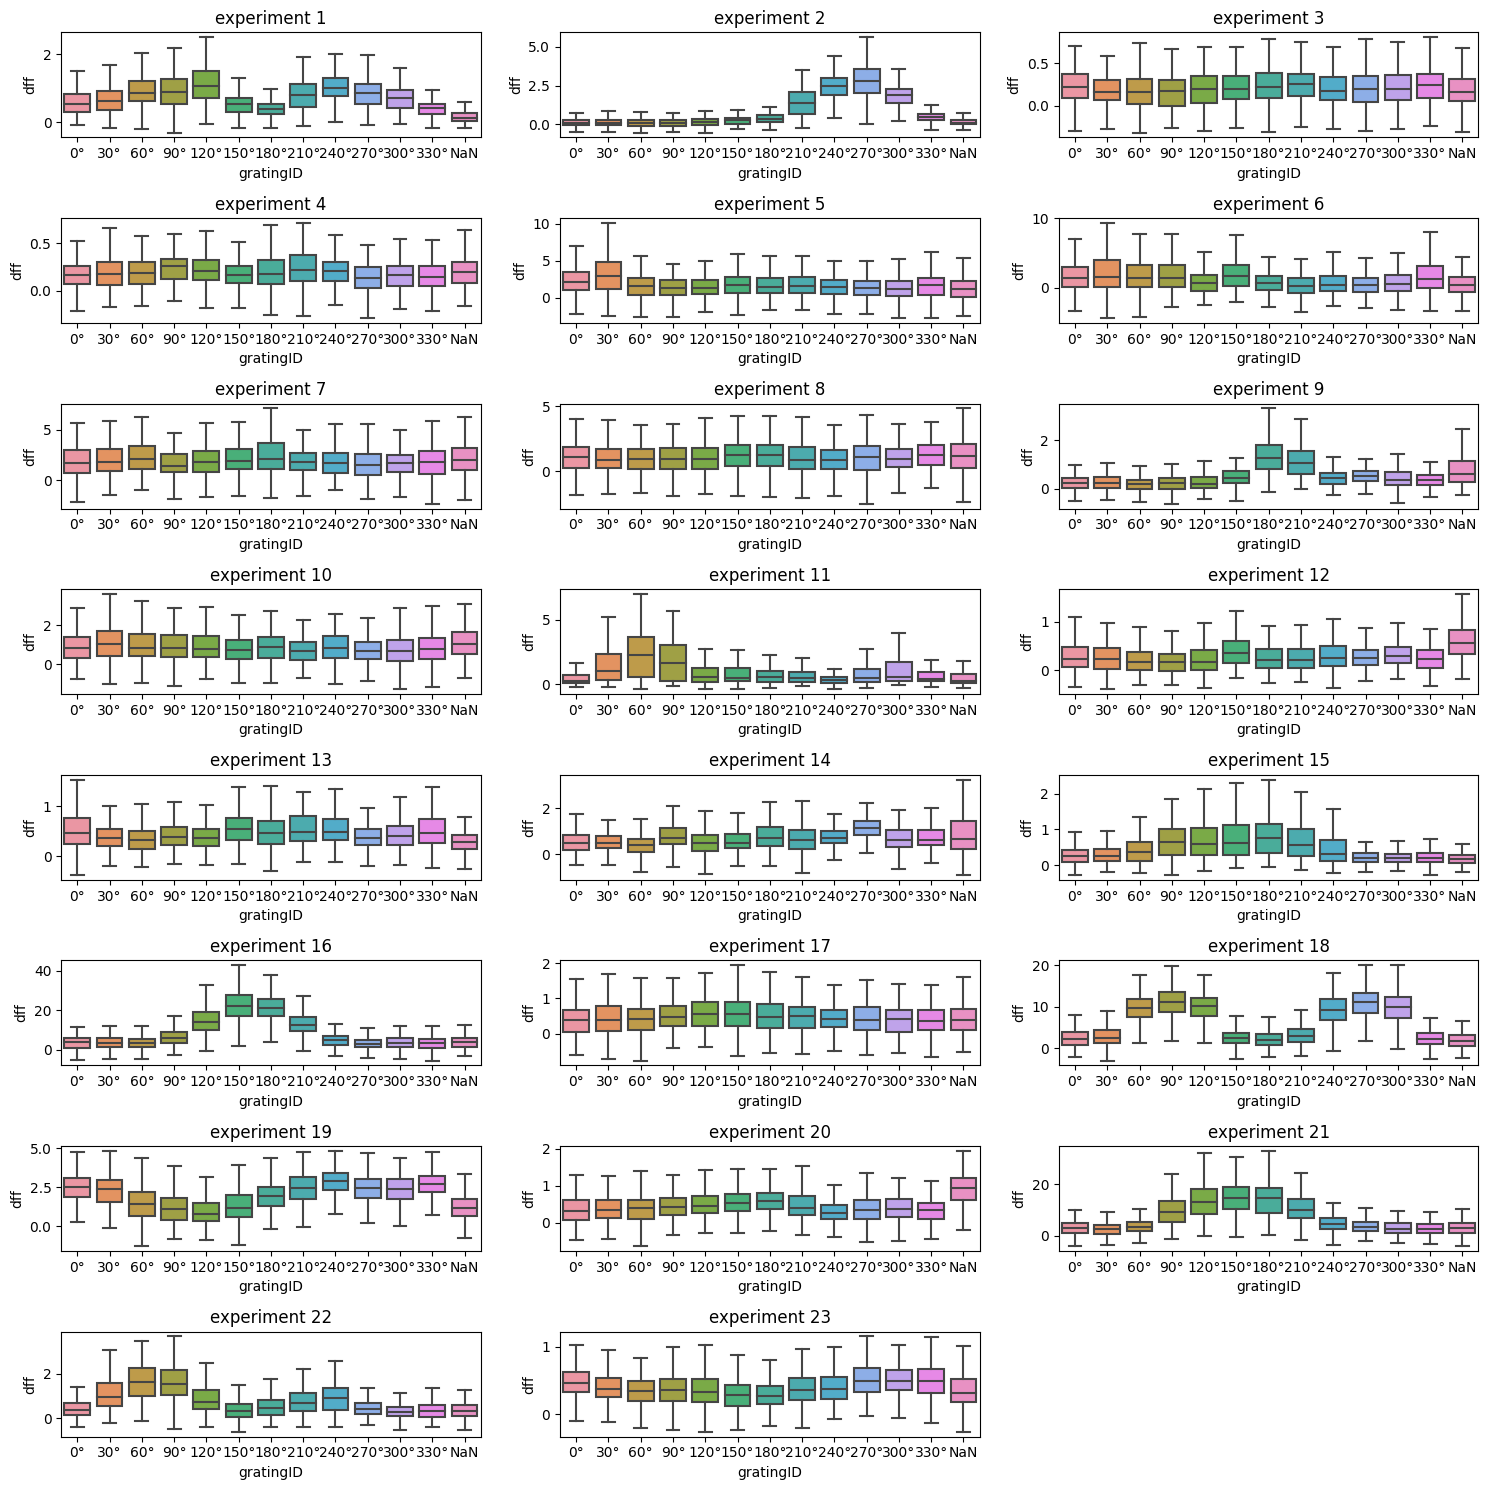

In [103]:
# Get the unique list of experiments
experiments = merged_df['experiment'].sort_values().unique()

print(experiments)

# Calculate the number of rows needed for the experiments, assuming 3 columns.
n_rows = len(experiments) // 3
if len(experiments) % 3:
    n_rows += 1

# Set the size of the figure
fig, axes = plt.subplots(figsize=(15, 15), nrows=n_rows, ncols=3)

# Flatten the axle array for easier operation
axes = axes.flatten()

# Iterate through the experiments and the axes of the figure.
for i, experiment in enumerate(experiments):
    ax = axes[i]  
    data = merged_df[(merged_df['in_interval']==True) & (merged_df['nROIs']==0) & (merged_df['experiment']==experiment)]
    data=data.sort_values(by=['experiment','nROIs'])
    experiment_id=data['experiment_id'].unique()
    
    sns.boxplot(x="gratingID", y="dff", data=data, showfliers=False, ax=ax)
    ax.set_xticks(range(0, 13, 1))
    ax.set_xticklabels(mapping.values())
    
    # Add the title of the experiment
    ax.set_title(f"{experiment_id[0]}")

# Remove empty axes if any
for i in range(len(experiments), len(axes)):
    fig.delaxes(axes[i])

# Adjust the spacing between subfigures and display the graph
plt.tight_layout()
plt.show()

## Pupil size over time

In [12]:
intervals=filtered_one_experiment[filtered_one_experiment['nROIs']==0 ][filtered_one_experiment['in_interval']==True ][['interval_ID','start','end','gratingID','gratingValue']]
intervals_unique=intervals.drop_duplicates(['interval_ID','start','end','gratingID','gratingValue'])

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_7860\4049054072.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intervals=filtered_one_experiment[filtered_one_experiment['nROIs']==0 ][filtered_one_experiment['in_interval']==True ][['interval_ID','start','end','gratingID','gratingValue']]


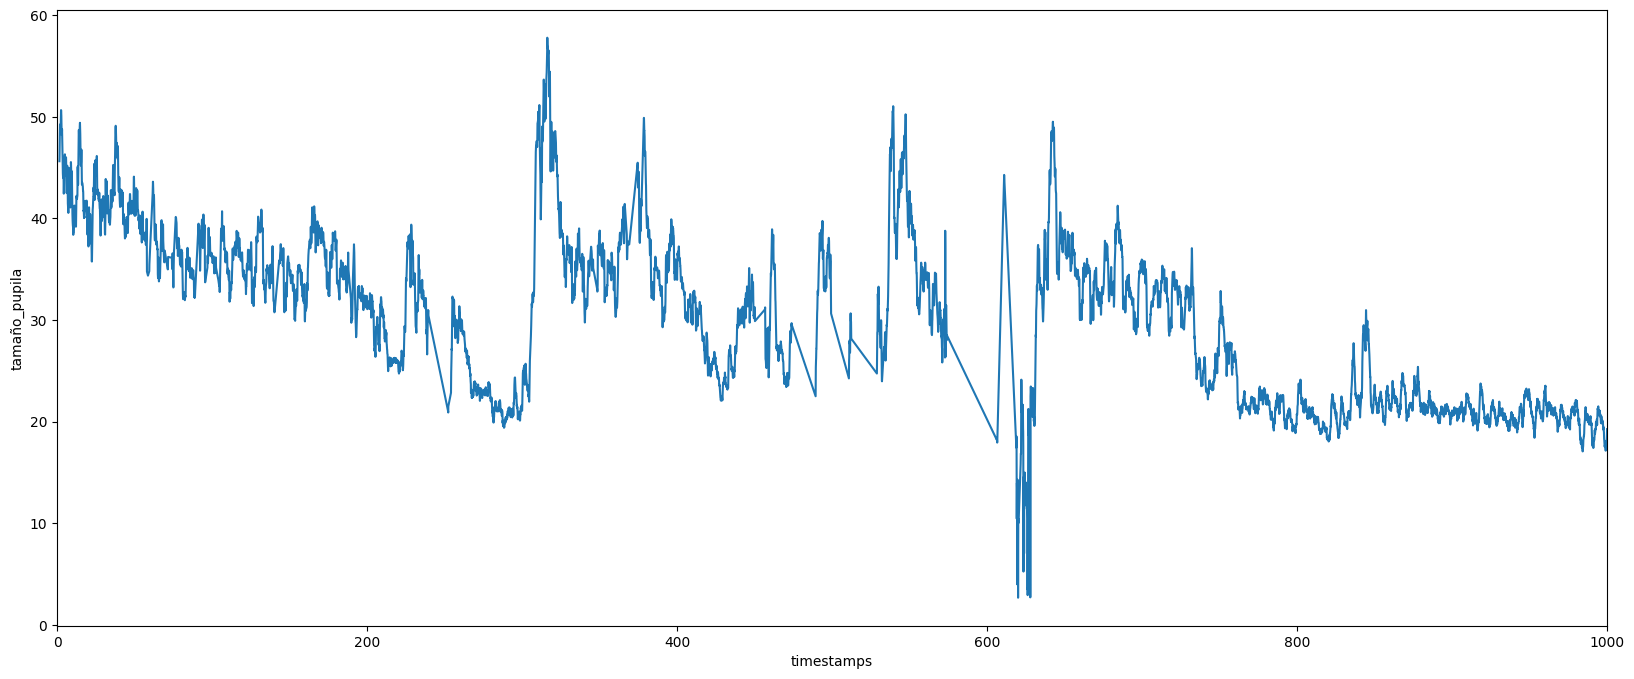

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(20,8))
filtered_data = filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0) ]
sns.lineplot(x='timestamps', y='tamaño_pupila', data=filtered_data)
plt.xlim(0,1000)
plt.show()

## Speed over time

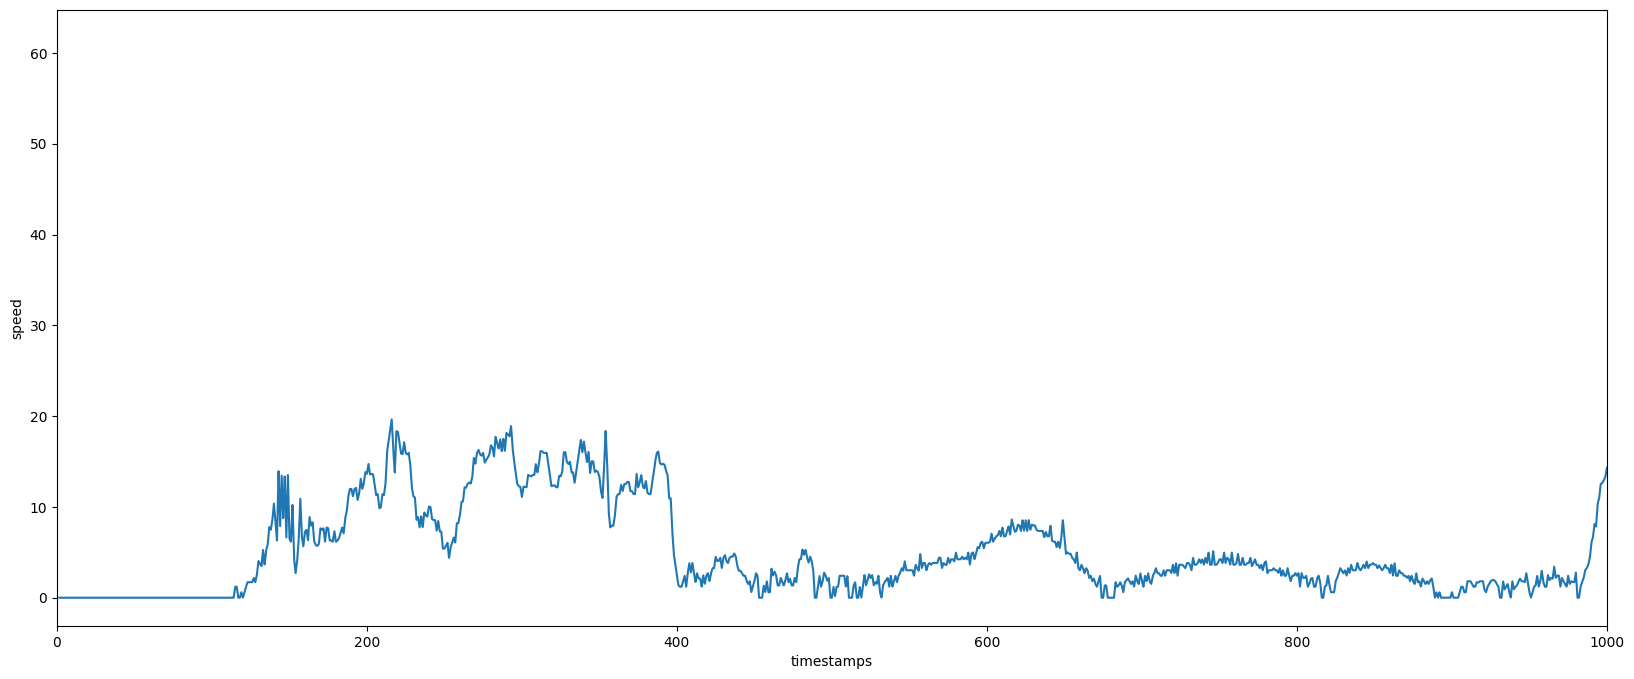

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=1, figsize=(20,8))
filtered_data = filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0) ]
sns.lineplot(x='timestamps', y='speed', data=filtered_data)
plt.xlim(0,1000)
plt.show()

In [40]:
merged_df['interval_ID_enum'].nunique()

31

In [11]:
unique_counts = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['gratingID']==1].groupby('experiment')['timestamps'].nunique()

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_15740\3422973758.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_counts = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['gratingID']==1].groupby('experiment')['timestamps'].nunique()
C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_15740\3422973758.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_counts = merged_df[merged_df['in_interval']==True][merged_df['nROIs']==0][merged_df['gratingID']==1].groupby('experiment')['timestamps'].nunique()


In [12]:
unique_counts = unique_counts.reset_index()
unique_counts.columns = ['experiment', 'unique_count']
unique_counts

,experiment,unique_count
0,SS038/2015-02-17/001,305
1,SS041/2015-04-23/001,180
2,SS044/2015-04-28/001,182
3,SS044/2015-05-29/001,150
4,SS045/2015-05-04/001,230
5,SS045/2015-05-05/001,230
6,SS047/2015-11-23/001,229
7,SS047/2015-12-03/001,226
8,SS048/2015-11-09/001,226
9,SS048/2015-12-02/001,227


In [13]:
# Contar los valores únicos de interval_ID_enum agrupados por folder
unique_counts = merged_df.groupby('experiment')['interval_ID_enum'].nunique()
# Convertir la serie a DataFrame
unique_counts = unique_counts.reset_index()
unique_counts.columns = ['experiment', 'unique_count']

print(unique_counts)

              experiment  unique_count
0   SS038/2015-02-17/001            31
1   SS041/2015-04-23/001            16
2   SS044/2015-04-28/001            13
3   SS044/2015-05-29/001            19
4   SS045/2015-05-04/001            19
5   SS045/2015-05-05/001            19
6   SS047/2015-11-23/001            16
7   SS047/2015-12-03/001            16
8   SS048/2015-11-09/001            16
9   SS048/2015-12-02/001            16
10  SS066/2016-09-01/001            19
11  SS069/2016-10-11/001            19
12  SS069/2016-10-13/001            16
13  SS070/2016-10-18/001            15
14  SS071/2016-10-18/001            15
15  SS075/2017-09-13/001            17
16  SS075/2017-09-27/001            25
17  SS076/2017-10-04/001            40
18  SS077/2017-10-03/001            49
19  SS077/2017-10-05/001            20
20  SS078/2017-09-28/001            17
21  SS078/2017-10-04/001            47
22  SS078/2017-10-05/001            45


In [16]:
unique_counts

,experiment,unique_count
0,SS038/2015-02-17/001,31
1,SS041/2015-04-23/001,16
2,SS044/2015-04-28/001,13
3,SS044/2015-05-29/001,19
4,SS045/2015-05-04/001,19
5,SS045/2015-05-05/001,19
6,SS047/2015-11-23/001,16
7,SS047/2015-12-03/001,16
8,SS048/2015-11-09/001,16
9,SS048/2015-12-02/001,16


In [18]:
# Merge de los DataFrames
merged_df = pd.merge(merged_df, unique_counts, on='experiment', how='left')

In [19]:
# Create the mapping dictionary
mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}

# Define the desired gratingIDs
grating_ids = [1, 4, 7, 10]
grating_values = ['0°', '90°', '180°', '270°']
nROIs_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]

# Calculate the Time2 column using the dictionary. 
#This is the number of seconds before and after the 2 second interval.
merged_df['Time2'] = merged_df['interval_ID_enum_2'] * (6 / (3*merged_df['unique_count']))



In [20]:
# Create a dictionary for associating grating_id with grating_value
grating_dict = dict(zip(grating_ids, grating_values))

In [21]:
grating_dict

{1: '0°', 4: '90°', 7: '180°', 10: '270°'}

## dff average over time by grating direction

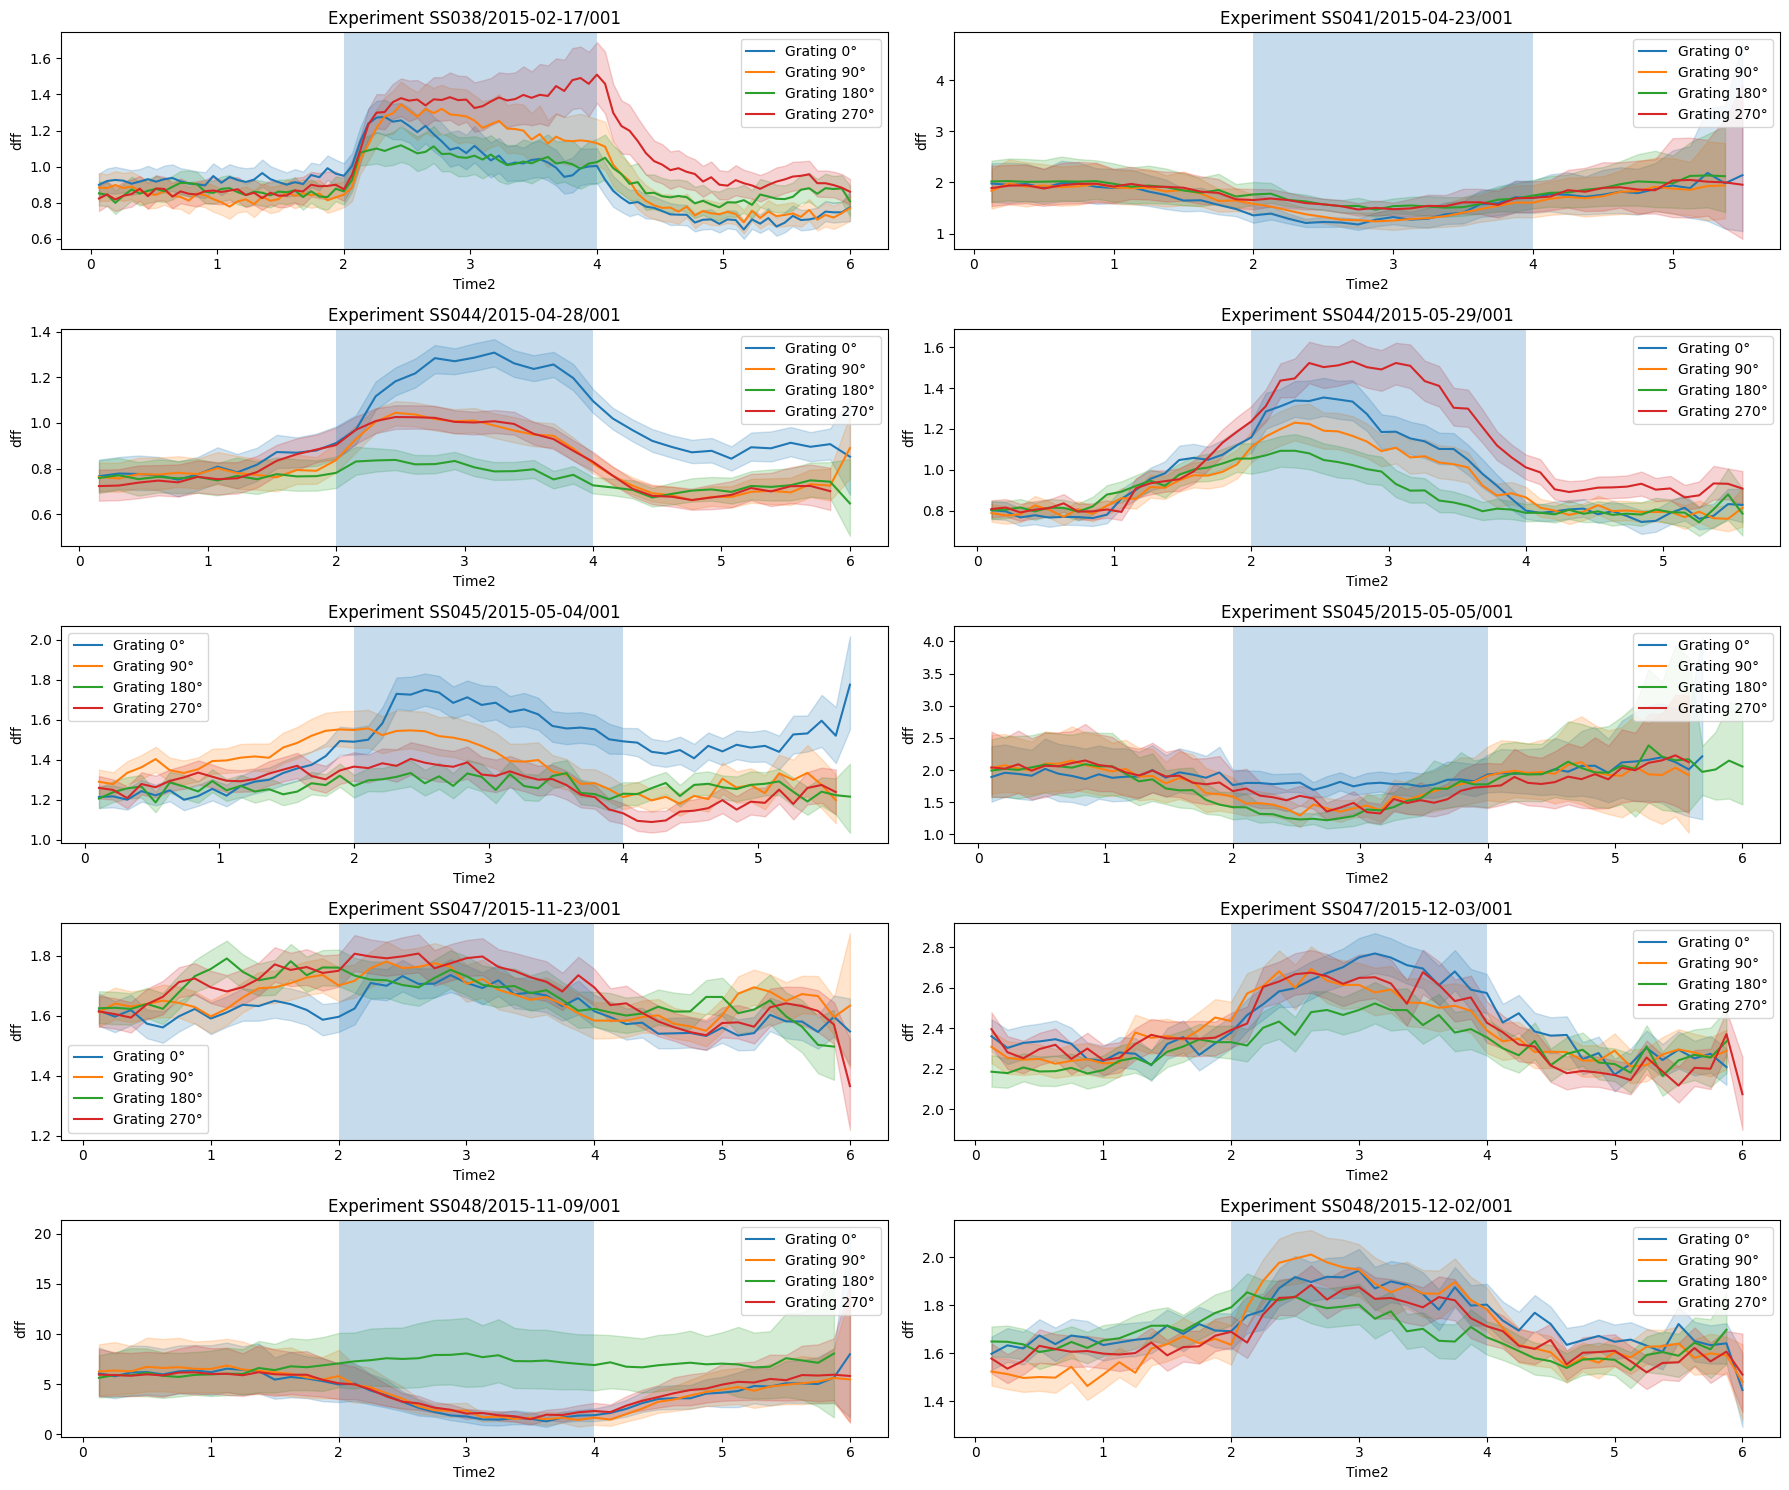

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la lista única de experimentos
experiments = merged_df['experiment'].unique()

# Configurar el tamaño de la figura
fig, axes = plt.subplots(figsize=(18, 15), nrows=5, ncols=2)

# Iterar a través de los experimentos y los ejes de la figura
for i, experiment in enumerate(experiments):
    row = i // 2  # Fila actual (0-4)
    col = i % 2   # Columna actual (0-1)
    
    ax = axes[row, col]  # Obtener el eje correspondiente
    
    for grating_id in grating_ids:
        grating_value = grating_dict[grating_id]
        data = merged_df[(merged_df['gratingID_3'] == grating_id) & (merged_df['experiment'] == experiment)]

        sns.lineplot(x='Time2', y='dff', ax=ax, label=f'Grating {grating_value}', data=data)
        
    ax.axvspan(2, 4, alpha=0.25)
    ax.set_title(f'Experiment {experiment}')
    
# Ajustar el espaciado entre subfiguras y mostrar el gráfico
plt.tight_layout()
plt.show()

# Neuron selectivity analysis

In [37]:
#Step 1: #Calculate the z-score for column 'dff'.

#Calculate the mean and standard deviation for each neuron
mean_by_neuron = merged_df[merged_df['in_interval']==True].groupby(['experiment', 'nROIs'])['dff'].mean()
std_by_neuron = merged_df[merged_df['in_interval']==True].groupby(['experiment', 'nROIs'])['dff'].std()

# Function to apply Z-score to each neuron's values
def z_score(row):
    neuron_mean = mean_by_neuron[row['nROIs']]
    neuron_std = std_by_neuron[row['nROIs']]
    return (row['dff'] - neuron_mean) / neuron_std

# Apply the Z-score to the 'dff' column of your dataframe.
merged_df['z_score_dff'] = merged_df[merged_df['in_interval']==True].apply(z_score, axis=1)

In [38]:
grouped = merged_df.groupby(['experiment', 'nROIs',  'gratingID','gratingValue'])

# Apply an aggregation function
result = grouped['z_score_dff'].mean()

# Calculate the standard error of the mean
sem = grouped['z_score_dff'].sem()

## Create a DataFrame with the results
result = pd.DataFrame(result)
result['sem'] = sem
result = result.reset_index()

In [39]:
result

,experiment,nROIs,gratingID,gratingValue,z_score_dff,sem
0,SS038/2015-02-17/001,0,1.0,0°,-0.246072,0.044367
1,SS038/2015-02-17/001,0,2.0,30°,-0.147521,0.044736
2,SS038/2015-02-17/001,0,3.0,60°,0.497391,0.054378
3,SS038/2015-02-17/001,0,4.0,90°,0.476009,0.059900
4,SS038/2015-02-17/001,0,5.0,120°,0.880404,0.064736
...,...,...,...,...,...,...
82558,SS078/2017-10-05/001,237,9.0,240°,-0.501442,0.009225
82559,SS078/2017-10-05/001,237,10.0,270°,-0.328454,0.012025
82560,SS078/2017-10-05/001,237,11.0,300°,-0.289287,0.012965
82561,SS078/2017-10-05/001,237,12.0,330°,-0.150560,0.016852


In [40]:
data=result[result['experiment']=='SS038/2015-02-17/001'][result['nROIs']==0][result['gratingID']<13]

C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_16260\273296745.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=result[result['experiment']=='SS038/2015-02-17/001'][result['nROIs']==0][result['gratingID']<13]
C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_16260\273296745.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=result[result['experiment']=='SS038/2015-02-17/001'][result['nROIs']==0][result['gratingID']<13]


In [41]:
data

,experiment,nROIs,gratingID,gratingValue,z_score_dff,sem
0,SS038/2015-02-17/001,0,1.0,0°,-0.246072,0.044367
1,SS038/2015-02-17/001,0,2.0,30°,-0.147521,0.044736
2,SS038/2015-02-17/001,0,3.0,60°,0.497391,0.054378
3,SS038/2015-02-17/001,0,4.0,90°,0.476009,0.059900
4,SS038/2015-02-17/001,0,5.0,120°,0.880404,0.064736
5,SS038/2015-02-17/001,0,6.0,150°,-0.360319,0.038484
6,SS038/2015-02-17/001,0,7.0,180°,-0.615052,0.033122
7,SS038/2015-02-17/001,0,8.0,210°,0.227496,0.052392
8,SS038/2015-02-17/001,0,9.0,240°,0.703028,0.047884
9,SS038/2015-02-17/001,0,10.0,270°,0.415257,0.054232


C:\Users\FelipeMartin\AppData\Local\Temp\ipykernel_16260\1789725001.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='gratingID', y='z_score_dff', marker='o', data=data, ci=None)


<Axes: xlabel='gratingID', ylabel='z_score_dff'>

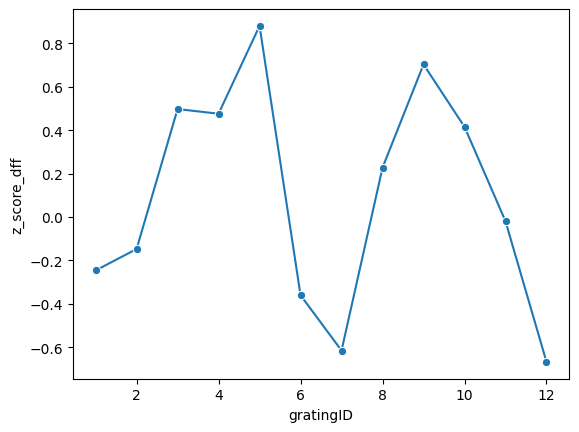

In [42]:
 sns.lineplot(x='gratingID', y='z_score_dff', marker='o', data=data, ci=None)

In [43]:
# Group by experiment and nRois, then calculate the minimum and maximum of z_score_dff
grouped_max_min = result.groupby(['experiment', 'nROIs'])['z_score_dff'].agg(['min', 'max']).reset_index()

In [44]:
grouped_max_min['DSI']=  ( grouped_max_min['max'] - grouped_max_min['min'] ) /grouped_max_min['max']

In [45]:
grouped_max_min

,experiment,nROIs,min,max,DSI
0,SS038/2015-02-17/001,0,-1.159788,0.880404,2.317336
1,SS038/2015-02-17/001,1,-0.503921,0.398678,2.263980
2,SS038/2015-02-17/001,2,-0.587428,0.464178,2.265523
3,SS038/2015-02-17/001,3,-0.322229,0.406031,1.793608
4,SS038/2015-02-17/001,4,-0.265148,1.573505,1.168508
...,...,...,...,...,...
6346,SS078/2017-10-05/001,233,-0.610631,-0.284039,-1.149814
6347,SS078/2017-10-05/001,234,-0.641692,-0.213696,-2.002821
6348,SS078/2017-10-05/001,235,-0.367457,-0.006274,-57.569548
6349,SS078/2017-10-05/001,236,-0.457683,-0.420618,-0.088121


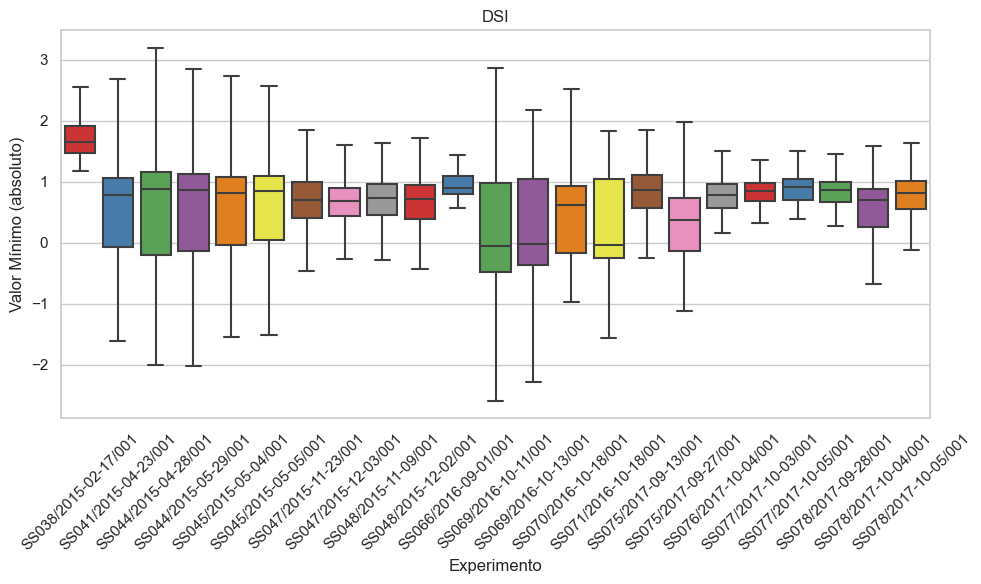

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Crear el gráfico de boxplot por experimento
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_max_min, x='experiment', y='DSI', palette='Set1', showfliers=False)
plt.title("DSI")
plt.xlabel("Experimento")
plt.ylabel("Valor Mínimo (absoluto)")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Create summary tables

In [48]:
# Define function for categorising
def category_pupil(value):
    if value == 1:
        return 'Large pupil'
    elif value == 0:
        return 'Small pupil'
    elif value=='NaN':
        return 'NaN'
    
# Apply the function to the column 'largePupil' to create the new column 'pupil_size_category'.
filtered_one_experiment['pupil_size_category'] = filtered_one_experiment['largePupil'].apply(category_pupil)

In [49]:
grouped = filtered_one_experiment.groupby(['experiment', 'nROIs',  'gratingID','gratingValue'])

# Apply an aggregation function (mean)
result = grouped['dff'].mean()

# Calculate the standard error of the mean
sem = grouped['dff'].sem()

# Create a DataFrame with the results
result = pd.DataFrame(result)
result['sem'] = sem
result = result.reset_index()

In [50]:
import re
# Function to convert angle from format "30°" to number
def convertir_angulo(angulo_str):
     # Extract the numerical value of the angle using regular expressions
    angulo_num = re.findall(r'\d+', angulo_str)
    return int(angulo_num[0]) if len(angulo_num) > 0 else None

# Create the new column 'Angulos_numerico' by applying the function to the column 'Angulos'.
result['gratingValue_numeric'] = result['gratingValue'].apply(convertir_angulo)

In [51]:
result

,experiment,nROIs,gratingID,gratingValue,dff,sem,gratingValue_numeric
0,SS048/2015-11-09/001,0,1.0,0°,0.301332,0.025763,0.0
1,SS048/2015-11-09/001,0,2.0,30°,0.434542,0.045246,30.0
2,SS048/2015-11-09/001,0,3.0,60°,0.197057,0.022025,60.0
3,SS048/2015-11-09/001,0,4.0,90°,0.270884,0.027540,90.0
4,SS048/2015-11-09/001,0,5.0,120°,0.382717,0.037458,120.0
...,...,...,...,...,...,...,...
3024,SS048/2015-11-09/001,232,9.0,240°,0.968540,0.048779,240.0
3025,SS048/2015-11-09/001,232,10.0,270°,0.937662,0.051240,270.0
3026,SS048/2015-11-09/001,232,11.0,300°,1.066911,0.053207,300.0
3027,SS048/2015-11-09/001,232,12.0,330°,1.217526,0.059035,330.0


In [53]:
grouped_max_dff=result.groupby(['nROIs'])

indices_max_dff_por_grupo = grouped_max_dff['dff'].idxmax()

angulos_max_dff_por_grupo = result.loc[indices_max_dff_por_grupo, 'gratingValue']
angulos_max_dff_por_grupo_ID = result.loc[indices_max_dff_por_grupo, 'gratingID']
# Obtain the values of "dff" corresponding to the indices where the maximum value of "dff" is found for each group.
valores_max_dff_por_grupo = result.loc[indices_max_dff_por_grupo, 'dff']
nrois_max_dff_por_grupo = result.loc[indices_max_dff_por_grupo, 'nROIs']

# Create a new DataFrame with the angles and "dff" values obtained.
max_dff_by_nrois = pd.DataFrame({'nROIS': nrois_max_dff_por_grupo.values, 'gratingID': angulos_max_dff_por_grupo_ID.values,'gratingValue': angulos_max_dff_por_grupo.values, 'dff_max': valores_max_dff_por_grupo.values})

# Sort the DataFrame by 'nROIS' and then by 'gratingid' # Sort the DataFrame by 'nROIS' and then by 'gratingid'.
max_dff_by_nrois = max_dff_by_nrois.sort_values(by=['gratingID'])

max_dff_by_nrois

,nROIS,gratingID,gratingValue,dff_max
232,232,1.0,0°,1.484517
181,181,1.0,0°,3.196735
16,16,1.0,0°,1.539935
174,174,1.0,0°,2.525953
44,44,1.0,0°,2.271545
...,...,...,...,...
198,198,13.0,NaN,7.139588
23,23,13.0,NaN,0.901155
139,139,13.0,NaN,0.743995
133,133,13.0,NaN,1.013736


In [43]:
grouped_pupil_category = filtered_one_experiment.groupby(['pupil_size_category','nROIs','experiment', 'gratingID','gratingValue'])

# Aplicar una función de agregación, por ejemplo, sumar los valores de Col5
result_pupil_category = grouped_pupil_category['dff'].mean()

mean_pupil_category = grouped_pupil_category['tamaño_pupila'].mean()

# Calcular el error estándar de la media
sem_pupil_category = grouped_pupil_category['dff'].sem()

# Crear un DataFrame con los resultados
result_pupil_category = pd.DataFrame(result_pupil_category)
result_pupil_category['diameter'] = mean_pupil_category
result_pupil_category['sem'] = sem_pupil_category
result_pupil_category = result_pupil_category.reset_index()

In [44]:
# Crear la nueva columna 'Angulos_numerico' aplicando la función a la columna 'Angulos'
result_pupil_category['gratingValue_numeric'] = result_pupil_category['gratingValue'].apply(convertir_angulo)

In [45]:
result_pupil_category

,pupil_size_category,nROIs,experiment,gratingID,gratingValue,dff,diameter,sem,gratingValue_numeric
0,Large pupil,0,SS048/2015-11-09/001,1.0,0°,0.365127,71.848369,0.044009,0
1,Large pupil,0,SS048/2015-11-09/001,2.0,30°,0.291280,68.969371,0.025552,30
2,Large pupil,0,SS048/2015-11-09/001,3.0,60°,0.123610,68.618790,0.023574,60
3,Large pupil,0,SS048/2015-11-09/001,4.0,90°,0.303708,67.922198,0.038357,90
4,Large pupil,0,SS048/2015-11-09/001,5.0,120°,0.341112,69.194410,0.035854,120
...,...,...,...,...,...,...,...,...,...
5587,Small pupil,232,SS048/2015-11-09/001,8.0,210°,1.028826,52.776104,0.089039,210
5588,Small pupil,232,SS048/2015-11-09/001,9.0,240°,0.930443,55.025568,0.073867,240
5589,Small pupil,232,SS048/2015-11-09/001,10.0,270°,0.975747,54.470716,0.063750,270
5590,Small pupil,232,SS048/2015-11-09/001,11.0,300°,1.054840,55.365721,0.066800,300


In [47]:
grouped_pupil_category_NOnROIS = filtered_one_experiment.groupby(['pupil_size_category','experiment', 'gratingID'])

# Aplicar una función de agregación, por ejemplo, sumar los valores de Col5
result_pupil_category_NOnROIS = grouped_pupil_category_NOnROIS['z_score_dff'].mean()
#result_pupil_category_NOnROIS = grouped_pupil_category_NOnROIS['z_score_dff'].mean()


mean_pupil_category_NOnROIS = grouped_pupil_category_NOnROIS['tamaño_pupila'].mean()
# Calcular el error estándar de la media
sem_pupil_category_NOnROIS = grouped_pupil_category_NOnROIS['z_score_dff'].sem()

# Crear un DataFrame con los resultados
result_pupil_category_NOnROIS = pd.DataFrame(result_pupil_category_NOnROIS)
result_pupil_category_NOnROIS['diameter'] = mean_pupil_category_NOnROIS
result_pupil_category_NOnROIS['sem'] = sem_pupil_category_NOnROIS
result_pupil_category_NOnROIS = result_pupil_category_NOnROIS.reset_index()

In [48]:
result_pupil_category_NOnROIS

,pupil_size_category,experiment,gratingID,z_score_dff,diameter,sem
0,Large pupil,SS048/2015-11-09/001,1.0,-0.022594,71.848369,0.007435
1,Large pupil,SS048/2015-11-09/001,2.0,-0.036621,68.969371,0.005370
2,Large pupil,SS048/2015-11-09/001,3.0,-0.047690,68.618790,0.006362
3,Large pupil,SS048/2015-11-09/001,4.0,0.020486,67.922198,0.006174
4,Large pupil,SS048/2015-11-09/001,5.0,-0.006121,69.194410,0.005293
5,Large pupil,SS048/2015-11-09/001,6.0,0.015671,69.031323,0.005941
6,Large pupil,SS048/2015-11-09/001,7.0,0.023706,67.878548,0.007310
7,Large pupil,SS048/2015-11-09/001,8.0,0.051151,67.149453,0.005298
8,Large pupil,SS048/2015-11-09/001,9.0,0.073727,68.060006,0.005715
9,Large pupil,SS048/2015-11-09/001,10.0,0.167368,69.276448,0.008030


In [49]:
grouped_speed_category = filtered_one_experiment.groupby(['speed_category','experiment', 'nROIs', 'gratingID','gratingValue'])

# Aplicar una función de agregación, por ejemplo, sumar los valores de Col5
result_speed_category = grouped_speed_category['dff'].mean()

mean_speed_category = grouped_speed_category['speed'].mean()

# Calcular el error estándar de la media
sem_speed_category = grouped_speed_category['dff'].sem()

# Crear un DataFrame con los resultados
result_speed_category = pd.DataFrame(result_speed_category)
result_speed_category['speed'] = mean_speed_category
result_speed_category['sem'] = sem_speed_category
result_speed_category = result_speed_category.reset_index()

In [50]:
# Crear la nueva columna 'Angulos_numerico' aplicando la función a la columna 'Angulos'
result_speed_category['gratingValue_numeric'] = result_speed_category['gratingValue'].apply(convertir_angulo)

In [51]:
result_speed_category

,speed_category,experiment,nROIs,gratingID,gratingValue,dff,speed,sem,gratingValue_numeric
0,No Running,SS048/2015-11-09/001,0,1.0,0°,0.332118,0.000000,0.041839,0.0
1,No Running,SS048/2015-11-09/001,0,2.0,30°,0.164454,0.000000,0.023253,30.0
2,No Running,SS048/2015-11-09/001,0,3.0,60°,0.193138,0.000000,0.036493,60.0
3,No Running,SS048/2015-11-09/001,0,4.0,90°,0.461826,0.000000,0.056840,90.0
4,No Running,SS048/2015-11-09/001,0,5.0,120°,0.186983,0.000000,0.024453,120.0
...,...,...,...,...,...,...,...,...,...
6053,Running,SS048/2015-11-09/001,232,9.0,240°,1.034221,4.118613,0.069308,240.0
6054,Running,SS048/2015-11-09/001,232,10.0,270°,0.855235,4.786102,0.061418,270.0
6055,Running,SS048/2015-11-09/001,232,11.0,300°,1.061099,4.568044,0.069907,300.0
6056,Running,SS048/2015-11-09/001,232,12.0,330°,1.285456,3.101246,0.075670,330.0


In [52]:
grouped_speed_category_NOnROIS = filtered_one_experiment.groupby(['speed_category','experiment', 'gratingID'])

# Aplicar una función de agregación, por ejemplo, sumar los valores de Col5
result_speed_category_NOnROIS = grouped_speed_category_NOnROIS['z_score_dff'].mean()

mean_speed_category_NOnROIS = grouped_speed_category_NOnROIS['speed'].mean()

# Calcular el error estándar de la media
sem_speed_category_NOnROIS = grouped_speed_category_NOnROIS['z_score_dff'].sem()

# Crear un DataFrame con los resultados
result_speed_category_NOnROIS = pd.DataFrame(result_speed_category_NOnROIS)
result_speed_category_NOnROIS['speed'] = mean_speed_category_NOnROIS
result_speed_category_NOnROIS['sem'] = sem_speed_category_NOnROIS
result_speed_category_NOnROIS = result_speed_category_NOnROIS.reset_index()

In [53]:
result_speed_category_NOnROIS

,speed_category,experiment,gratingID,z_score_dff,speed,sem
0,No Running,SS048/2015-11-09/001,1.0,-0.052907,0.000000,0.006609
1,No Running,SS048/2015-11-09/001,2.0,-0.056119,0.000000,0.005813
2,No Running,SS048/2015-11-09/001,3.0,-0.052509,0.000000,0.006430
3,No Running,SS048/2015-11-09/001,4.0,-0.011400,0.000000,0.007770
4,No Running,SS048/2015-11-09/001,5.0,-0.045814,0.000000,0.005590
5,No Running,SS048/2015-11-09/001,6.0,-0.006514,0.000000,0.006203
6,No Running,SS048/2015-11-09/001,7.0,-0.004893,0.000000,0.006970
7,No Running,SS048/2015-11-09/001,8.0,0.045660,0.000000,0.006257
8,No Running,SS048/2015-11-09/001,9.0,0.083978,0.000000,0.006907
9,No Running,SS048/2015-11-09/001,10.0,0.140998,0.000000,0.007602


In [54]:
import warnings
warnings.filterwarnings("ignore")


# GRAPHS IN PDF


### This code creates a PDF file with the direction tuning curve of each ROIS for the filtered experiment in the filtered_one_experiment datafra

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Get the unique values of nROIs
conteo = filtered_one_experiment['nROIs'].unique()

# Define the desired gratingIDs
grating_ids = [1, 4, 7, 10]
grating_values = ['0°', '90°', '180°', '270°']
#nROIs_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]
nROIs_values = list(conteo)

def estandarizar_columna(df, columna_a_estandarizar):
      # Find the maximum absolute value
    abs_max_val = max(abs(df[columna_a_estandarizar].min()), abs(df[columna_a_estandarizar].max()))
    
    # Normalises the column between 0 and 1
    df['standardized_column'] = df[columna_a_estandarizar] / abs_max_val
    
    return df

# Create the mapping dictionary
mapping = {1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°',
           8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}

# Rescale interval_ID_enum field
filtered_one_experiment['Time'] = filtered_one_experiment['interval_ID_enum'] * (2 / 31)

filtered_one_experiment['Time2'] = filtered_one_experiment['interval_ID_enum_2'] * (6 / 93)

# Create a dictionary for associating grating_id with grating_value
grating_dict = dict(zip(grating_ids, grating_values))

filtered_one_experiment['gratingValue'] = filtered_one_experiment['gratingID'].map(mapping)

print(mapping)

#sns.set_theme(style="white")
sns.set(style="darkgrid")
# Crear un objeto PdfPages para guardar los gráficos en un PDF
pdf = PdfPages('graficos.pdf')

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(18, 28), nrows=5, ncols=2)

for grating_id in grating_ids:
    grating_value = grating_dict[grating_id]
    data = filtered_one_experiment[(filtered_one_experiment['gratingID_3'] == grating_id)]
    
    sns.lineplot(x='Time2', y='tamaño_pupila', ax=ax[0][0], label=f'Grating {grating_value}', data=data, ci=None)
    sns.lineplot(x='Time2', y='speed', ax=ax[0][1], label=f'Grating {grating_value}', data=data, ci=None)

sns.boxplot(x="tamaño_pupila",data=filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0)],ax=ax[1][0])
sns.boxplot(x="speed",data=filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0)],ax=ax[1][1])

sns.histplot(filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0)], x="tamaño_pupila",bins=50,ax=ax[2][0]) 

sns.histplot(filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0)], x="speed",bins=50,ax=ax[2][1]) 

sns.boxplot(x="gratingID", y="tamaño_pupila", data=filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0)],showfliers=True,ax=ax[3][0])

sns.boxplot(x="gratingID", y="speed", data=filtered_one_experiment[(filtered_one_experiment['nROIs'] == 0)],showfliers=True,ax=ax[3][1])

sns.lineplot(x='gratingID', y='z_score_dff', marker='o', ax=ax[4][0], data=result_pupil_category_NOnROIS, ci=None, hue='pupil_size_category')
ax[4][0].errorbar(result_pupil_category_NOnROIS['gratingID'], result_pupil_category_NOnROIS['z_score_dff'],  yerr=result_pupil_category_NOnROIS['sem'], fmt='none', color='red', capsize=5, alpha=0.5)

sns.lineplot(x='gratingID', y='z_score_dff', marker='o', ax=ax[4][1], data=result_speed_category_NOnROIS, ci=None, hue='speed_category')
ax[4][1].errorbar(result_speed_category_NOnROIS['gratingID'], result_speed_category_NOnROIS['z_score_dff'],  yerr=result_speed_category_NOnROIS['sem'], fmt='none', color='red', capsize=5, alpha=0.5)



ax[0][0].axvspan(2, 4, alpha=0.25)
ax[0][1].axvspan(2, 4, alpha=0.25)
    
ax[2][0].legend()    

ax[0][0].set_title('Pupil size by grating direction at 2-second intervals')
ax[0][1].set_title('Speed by grating direction at 2-second intervals')  
ax[1][0].set_title('Pupil diameter box plot')
ax[1][1].set_title('Speed box plot') 
ax[2][0].set_title('Pupil diameter histogram') 
ax[2][1].set_title('Speed histogram') 
ax[3][0].set_title('Pupil diameter by grating direction box plot') 
ax[3][1].set_title('speed by grating direction histogram') 
ax[4][0].set_title('Direction tuning curve by Pupil diameter') 
ax[4][1].set_title('Direction tuning curve by speed') 

ax[3][0].autoscale(axis='x', tight=False)
    #ax[1].set_xlim(list(range(1,13,1)))
ax[3][0].set_xticks(range(0, 13, 1))
ax[3][0].set_xticklabels(mapping.values())

ax[3][1].autoscale(axis='x', tight=False)
    #ax[1].set_xlim(list(range(1,13,1)))
ax[3][1].set_xticks(range(0, 13, 1))
ax[3][1].set_xticklabels(mapping.values())



ax[4][0].autoscale(axis='x', tight=False)
    #ax[1].set_xlim(list(range(1,13,1)))
ax[4][0].set_xticks(range(1, 14, 1))
ax[4][0].set_xticklabels(mapping.values())


ax[4][1].autoscale(axis='x', tight=False)
    #ax[1].set_xlim(list(range(1,13,1)))
ax[4][1].set_xticks(range(1, 14, 1))
ax[4][1].set_xticklabels(mapping.values())


ax[0][0].set_ylabel('Pupil Diameter')
ax[3][0].set_ylabel('Pupil Diameter')

ax[1][0].set_xlabel('Pupil Diameter')
ax[2][0].set_xlabel('Pupil Diameter')
ax[3][0].set_xlabel('Grating Direction')
ax[3][1].set_xlabel('Grating Direction')
ax[4][0].set_xlabel('Grating Direction')
ax[4][1].set_xlabel('Grating Direction')


pdf.savefig(fig)

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(22, 10), ncols=4,nrows=2)
#ax[2][1] = plt.subplot(2, 4, 2, polar=True)
ax[1][0].remove()
#polar_ax = plt.subplot(2, 4, (row_index * 4) + col_index + 1, projection='polar')
ax[1][1].remove()
polar_ax = plt.subplot(2, 4,(1 * 4) + 1 + 1, projection='polar')
ax[1][2].remove()
polar_ax_2 = plt.subplot(2, 4,(1 * 4) + 2 + 1, projection='polar')
ax[1][3].remove()
polar_ax_3 = plt.subplot(2, 4,(1 * 4) + 3 + 1, projection='polar')

import scipy.stats as stats
import matplotlib.pyplot as plt

# Iterar sobre cada nROIs y gratingID y crear un gráfico para cada combinación
from sklearn.preprocessing import StandardScaler
angle_ticks = np.arange(0, 360, 30)
angle_ticks_rads = np.radians(angle_ticks)

scaler = StandardScaler()
for nROIs in nROIs_values:

    for grating_id in grating_ids:
        # Filtrar los datos por gratingID y nROIs
        data = filtered_one_experiment[(filtered_one_experiment['gratingID_3'] == grating_id) & (filtered_one_experiment['nROIs'] == nROIs)]
        data2 = result[result['nROIs'] == nROIs]
        data3=result_pupil_category[result_pupil_category['nROIs'] == nROIs][result_pupil_category['pupil_size_category'] == 'Large pupil']
        data4=result_pupil_category[result_pupil_category['nROIs'] == nROIs][result_pupil_category['pupil_size_category'] == 'Small pupil']
        data5= result_pupil_category[result_pupil_category['nROIs'] == nROIs]
        data6= result_speed_category[result_speed_category['nROIs'] == nROIs]      
        
        

            
        # Obtener el grating_value correspondiente al grating_id
        grating_value = grating_dict[grating_id]

        # Crear el gráfico de líneas con Seaborn y asignar un color diferente
        sns.lineplot(x='Time2', y='dff', data=data  , ax=ax[0][0], label=f'Grating {grating_value}', ci=None)
        
        #sns.lineplot(x='Time', y='tamaño_pupila', marker='o', ax=ax[2], label=f'Grating {grating_value}', data=data, ci=None)
     
    
    sns.lineplot(x='gratingID', y='dff', marker='o', ax=ax[0][1], data=data2[data2['gratingID']<13], label='Average across time for each stimulus direction',err_style="bars", errorbar=('se',2))
    #sns.lineplot(x='gratingID', y='sem', marker='o', ax=ax[1], data=data2, ci='sd', linestyle='dashed',label='Standard error of the mean for each stimulus direction')
    ax[0][1].errorbar(data2['gratingID'][data2['gratingID']<13], data2['dff'][data2['gratingID']<13],  yerr=data2['sem'][data2['gratingID']<13], fmt='none', color='red', capsize=5, alpha=0.5)
    meandff13=data2['dff'][data2['gratingID']==13].mean()  
    sem13=list(data2['sem'][data2['gratingID']==13])[0]
    ax[0][1].axhline(meandff13, color='grey', linestyle='dashed', linewidth=2, label='Average for measurements without grating angle')
    ax[0][1].axhspan(meandff13+sem13, meandff13-sem13, alpha=0.25)
    
    
    sns.lineplot(x='gratingID', y='dff', marker='o', ax=ax[0][2], data=data5[data5['gratingID']<13], hue='pupil_size_category')
    ax[0][2].errorbar(data5['gratingID'][data5['gratingID']<13], data5['dff'][data5['gratingID']<13],  yerr=data5['sem'][data5['gratingID']<13], fmt='none', color='red', capsize=5, alpha=0.5)
    #meandff13_largepupil=data5['dff'][data5['gratingID']==13][data5['pupil_size_category']=='Large pupil'].mean()
    meandff13_smallpupil=data2['dff'][data2['gratingID']==13].mean() 
    #sem13=list(data5['sem'][data5['gratingID']==13])[0]
    #ax[2].axhline(meandff13_largepupil, color='blue', linestyle='dashed', linewidth=2, label='Mean')
    ax[0][2].axhline(meandff13_smallpupil, color='grey', linestyle='dashed', linewidth=2, label='Mean')
    ax[0][2].axhspan(meandff13_smallpupil+sem13, meandff13_smallpupil-sem13, alpha=0.25)
    

    sns.lineplot(x='gratingID', y='dff', marker='o', ax=ax[0][3], data=data6[data6['gratingID']<13], hue='speed_category')
    ax[0][3].errorbar(data6['gratingID'][data6['gratingID']<13], data6['dff'][data6['gratingID']<13],  yerr=data6['sem'][data6['gratingID']<13], fmt='none', color='red', capsize=5, alpha=0.5)    
    #meandff13_norunning=data6['dff'][data6['gratingID']==13][data6['speed_category']=='No Running'].mean()
    meandff13_running=data2['dff'][data2['gratingID']==13].mean() 
    #sem13=list(data6['sem'][data6['gratingID']==13])[0]
    #ax[3].axhline(meandff13_norunning, color='blue', linestyle='dashed', linewidth=2, label='Mean')
    ax[0][3].axhline(meandff13_running, color='grey', linestyle='dashed', linewidth=2, label='Mean')
    ax[0][3].axhspan(meandff13_running+sem13, meandff13_running-sem13, alpha=0.25)
    
    #GRAFICO POLAR

    # Seleccionar la columna que deseas normalizar
    columna_a_normalizar = 'dff'
    # Obtener el valor mínimo y máximo de la columna seleccionada
    #min_val = data2[columna_a_normalizar].min()
    #max_val = data2[columna_a_normalizar].max()
    

    max_val = data2[columna_a_normalizar].max()
    min_val = data2[columna_a_normalizar].min()
    
        # Normaliza la columna entre 0 y 1
    data2['standard_dff'] = (data2[columna_a_normalizar] - min_val) / (max_val - min_val)
    
    
    # Ajusta el scaler a los datos de la columna
    #data2['standard_dff'] = scaler.fit_transform(data2[[columna_a_normalizar]])
    
    
    
    # Normalizar la columna entre 0 y 1
    #data2['standard_dff'] = (data2[columna_a_normalizar] - min_val) / (max_val - min_val)
    dff_data = data2["standard_dff"][data2['gratingID']<13].values
    #print(dff_data)
    grating_angles  = data2["gratingValue_numeric"][data2['gratingID']<13].values
    grating_angles_rad = np.radians(grating_angles)
    r = dff_data
    theta = grating_angles_rad
    # Añadir manualmente los valores finales para cerrar el círculo
    theta_cierre = [theta[-1], theta[0]]  # Agregar el último ángulo y el primer ángulo
    r_cierre = [r[-1], r[0]]  # Agregar el último valor de r y el primer valor de r
    # Concatenar los valores para tener el gráfico completo
    #theta = np.concatenate([theta, theta_cierre])
    #r = np.concatenate([r, r_cierre])
    theta = np.concatenate([theta, theta_cierre])
    r = np.concatenate([r, r_cierre])
    
    # Extraer el valor de gratingID=13 y convertir el ángulo a radianes
    grating_13_value = data2["standard_dff"][data2['gratingID'] == 13].values[0]
    grating_13_angle = np.radians(data2["gratingValue_numeric"][data2['gratingID'] == 13].values[0])
    # Crear arreglos para el círculo correspondiente a gratingID=13
    theta_circulo = [grating_13_angle, grating_13_angle]
    r_circulo = [grating_13_value, grating_13_value]

    # Concatenar los valores para tener el gráfico completo con el círculo adicional
    # Crear un arreglo de ángulos que abarque todo el rango de valores de grating_angles_rad
    full_theta_range = np.linspace(0, 360, num=100000)
    # Crear un arreglo con el valor constante de dff repetido para cada ángulo
    r_grating_13 = np.full_like(full_theta_range, grating_13_value)

    #print(full_theta_range)
    #print(r_grating_13)
    
    polar_ax.plot(theta, r)
    # Graficar el nuevo círculo en el mismo gráfico polar
    polar_ax.plot(full_theta_range, r_grating_13, linestyle='dashed', color='lightblue' )

    plt.tight_layout()
    
    polar_ax.set_xticks(angle_ticks_rads)

    max_val = data5[columna_a_normalizar].max()
    min_val = data5[columna_a_normalizar].min()
    
    # Normalises the column between 0 and 1
    data5['standard_dff'] = (data5[columna_a_normalizar] - min_val) / (max_val - min_val)

        
        
    dff_data_LP = data5["standard_dff"][data5['pupil_size_category']=='Large pupil'][data5['gratingID']<13].values
    grating_angles_LP  = data5["gratingValue_numeric"][data5['pupil_size_category']=='Large pupil'][data5['gratingID']<13].values
    grating_angles_rad_LP = np.radians(grating_angles_LP)
    r_LP = dff_data_LP
    theta_LP = grating_angles_rad_LP
     # Manually add final values to close the loop
    theta_cierre_LP = [theta_LP[-1], theta_LP[0]]  # Add the last angle and the first angle
    r_cierre_LP = [r_LP[-1], r_LP[0]]  # Add the last value of r and the first value of r
    # Concatenate the values to get the complete graph
    theta_LP = np.concatenate([theta_LP, theta_cierre_LP])
    r_LP = np.concatenate([r_LP, r_cierre_LP])


    dff_data_SP = data5["standard_dff"][data5['pupil_size_category']=='Small pupil'][data5['gratingID']<13].values
    grating_angles_SP  = data5["gratingValue_numeric"][data5['pupil_size_category']=='Small pupil'][data5['gratingID']<13].values
    grating_angles_rad_SP = np.radians(grating_angles_SP)
    r_SP = dff_data_SP
    theta_SP = grating_angles_rad_SP
    # Manually add final values to close the loop
    theta_cierre_SP = [theta_SP[-1], theta_SP[0]]   # Add the last angle and the first angle
    r_cierre_SP = [r_SP[-1], r_SP[0]] # Add the last value of r and the first value of r
    # Concatenate the values to get the complete graph
    theta_SP = np.concatenate([theta_SP, theta_cierre_SP])
    r_SP = np.concatenate([r_SP, r_cierre_SP])
    
    polar_ax_2.plot(theta_LP, r_LP,label='Large pupil')
    polar_ax_2.plot(theta_SP, r_SP,label='Small pupil')
    polar_ax_2.plot(full_theta_range, r_grating_13, linestyle='dashed', color='lightblue' )
    polar_ax_2.set_xticks(angle_ticks_rads)
    plt.tight_layout()
    
     #SPEED 
    max_val = data6[columna_a_normalizar].max()
    min_val = data6[columna_a_normalizar].min()
    
    # Normalises the column between 0 and 1
    data6['standard_dff'] = (data6[columna_a_normalizar] - min_val) / (max_val - min_val)
    
    dff_data_R = data6["standard_dff"][data6['speed_category']=='Running'][data6['gratingID']<13].values
    grating_angles_R  = data6["gratingValue_numeric"][data6['speed_category']=='Running'][data6['gratingID']<13].values
    grating_angles_rad_R = np.radians(grating_angles_R)
    r_R = dff_data_R
    theta_R= grating_angles_rad_R
    # Manually add final values to close the loop
    theta_cierre_R = [theta_R[-1], theta_R[0]]  # Add the last angle and the first angle
    r_cierre_R = [r_R[-1], r_R[0]]  # Add the last value of r and the first value of r
    # Concatenate the values to get the complete graph
    theta_R = np.concatenate([theta_R, theta_cierre_R])
    r_R = np.concatenate([r_R, r_cierre_R])

    dff_data_NR = data6["standard_dff"][data6['speed_category']=='No Running'][data6['gratingID']<13].values
    grating_angles_NR  = data6["gratingValue_numeric"][data6['speed_category']=='No Running'][data6['gratingID']<13].values
    grating_angles_rad_NR = np.radians(grating_angles_NR)
    r_NR = dff_data_NR
    theta_NR = grating_angles_rad_NR
    # Añadir manualmente los valores finales para cerrar el círculo
    theta_cierre_NR = [theta_NR[-1], theta_NR[0]]  # Agregar el último ángulo y el primer ángulo
    r_cierre_NR = [r_NR[-1], r_NR[0]]  # Agregar el último valor de r y el primer valor de r
    # Concatenar los valores para tener el gráfico completo
    theta_NR = np.concatenate([theta_NR, theta_cierre_NR])
    r_NR = np.concatenate([r_NR, r_cierre_NR])
    
    polar_ax_3.plot(theta_NR, r_NR,label='No Running')
    polar_ax_3.plot(theta_R, r_R,label='Running')
    polar_ax_3.plot(full_theta_range, r_grating_13, linestyle='dashed', color='lightblue' )
    polar_ax_3.set_xticks(angle_ticks_rads)
    plt.tight_layout()
    
    ax[0][0].axvspan(2, 4, alpha=0.25)
    
        # Calcular los límites del eje x para esta iteración
    #x_min = min(x_min, merged_df['Time'].min())
    #x_max = max(x_max, merged_df['Time'].max())
    # Ajustar los límites del eje y para que sean iguales en los 3 gráficos
    y_min = min(ax[0][0].get_ylim()[0], ax[0][1].get_ylim()[0], ax[0][2].get_ylim()[0], ax[0][3].get_ylim()[0])
    y_max = max(ax[0][0].get_ylim()[1], ax[0][1].get_ylim()[1], ax[0][2].get_ylim()[1], ax[0][3].get_ylim()[1])

    for i in range(4):
        ax[0][i].set_ylim(y_min, y_max)

    ax[0][1].set_xticks(range(1, 13, 1))
    ax[0][1].set_xticklabels(list(mapping.values())[:12])
    
    ax[0][2].set_xticks(range(1, 13, 1))
    ax[0][2].set_xticklabels(list(mapping.values())[:12])

    ax[0][3].set_xticks(range(1, 13, 1))
    ax[0][3].set_xticklabels(list(mapping.values())[:12])
    

    ax[0][0].set_title('Mean dff per grid at 2-second intervals (ROI ' + str(nROIs) + ')')
    ax[0][1].set_title('Direction tuning curve (ROI ' + str(nROIs) + ')')    
    ax[0][2].set_title('Direction tuning curve by pupil diameter (ROI ' + str(nROIs)+ ')') 
    ax[0][3].set_title('Direction tuning curve by speed (ROI ' + str(nROIs)+ ')') 

    ax[0][0].legend()
    ax[0][1].legend()
    #ax[2].legend()
    polar_ax.legend()
    polar_ax_2.legend()
    polar_ax_3.legend()
    
    
    
    ax[0][0].set_xlabel('Time [s]')
    ax[0][1].set_xlabel('Grating Direction')
    ax[0][2].set_xlabel('Grating Direction')
    ax[0][3].set_xlabel('Grating Direction')

    # Save the graphic in the PDF file
    pdf.savefig(fig,bbox_inches='tight')
    plt.close()
    # Clear the chart for the next loop
    ax[0][0].clear()
    ax[0][1].clear()
    ax[0][2].clear()
    ax[0][3].clear()
    #ax[1][0].clear()
    polar_ax.clear()
    polar_ax_2.clear()
    polar_ax_3.clear()
    #ax[2].clear()


pdf.close()

{1: '0°', 2: '30°', 3: '60°', 4: '90°', 5: '120°', 6: '150°', 7: '180°', 8: '210°', 9: '240°', 10: '270°', 11: '300°', 12: '330°', 13: 'NaN'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 